<a href="https://colab.research.google.com/github/abhiiiinair24/MLAssignment2/blob/main/a2_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset

In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/datasets/dataset.csv')
df.head()

,f1,f2,f3,f4,f5,f6,f7,target
0,6,148,72,35,0,33.6,0.627,1
1,1,85,66,29,0,26.6,0.351,0
2,8,183,64,0,0,23.3,0.672,1
3,1,89,66,23,94,28.1,0.167,0
4,0,137,40,35,168,43.1,2.288,1


Analyze the dataset

In [ ]:
print("="*15,"Info","="*15)
print(df.info())

print("="*15,"Shape","="*15)
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

print("="*10,"Data Types","="*10)
print(df.dtypes)

print("="*10,"Numerical Stats","="*10)
print(df.describe())

print("="*35)

=============== Info ===============
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766 entries, 0 to 765
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   f1      766 non-null    object
 1   f2      766 non-null    object
 2   f3      766 non-null    int64 
 3   f4      766 non-null    object
 4   f5      766 non-null    object
 5   f6      766 non-null    object
 6   f7      766 non-null    object
 7   target  766 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 48.0+ KB
None
=============== Shape ===============
Rows: 766, Columns: 8
========== Data Types ==========
f1        object
f2        object
f3         int64
f4        object
f5        object
f6        object
f7        object
target     int64
dtype: object
========== Numerical Stats ==========
               f3      target
count  766.000000  766.000000
mean    69.118799    0.349869
std     19.376901    0.477240
min      0.000000    0.000000
25%     62.5

Handle invalid character entries

In [ ]:
df_cleaned = df.copy()

for col in df.columns:

    if df[col].dtype == 'object':
        unique_vals = df[col].unique()

        #regex for alphanumeric values
        invalid_vals = [v for v in unique_vals if not re.match(r'^[0-9a-zA-Z\.\-]*$', str(v))]

        if invalid_vals:
            print("Invalid values found: ")
        else:
            print("No invalid characters found.")

    else:

        col_str = df[col].astype(str)
        col_no_dot = col_str.str.replace('.', '', 1)
        is_digit = col_no_dot.str.isdigit()
        invalid_numeric = df[~is_digit]


        if not invalid_numeric.empty:
            print("Non-numeric values present in numeric column.")
            print(invalid_numeric.head())
        else:
            print("All numeric values are valid.")

    print("-" * 35)

    #Make sure the numerical columns do not include any random characters like '@,$',etc so conversion is more meaningful.
    #No invalid entries found, safe for conversion

No invalid characters found.
-----------------------------------
No invalid characters found.
-----------------------------------
All numeric values are valid.
-----------------------------------
No invalid characters found.
-----------------------------------
No invalid characters found.
-----------------------------------
No invalid characters found.
-----------------------------------
No invalid characters found.
-----------------------------------
All numeric values are valid.
-----------------------------------


In [ ]:
for col in df_cleaned.columns:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')  # turn invalids into NaN
    print("NaNs in column",col, df_cleaned[col].isna().sum())
    median_val = df_cleaned[col].median()
    df_cleaned.fillna({col:median_val}, inplace=True)

print("All invalid entries handled successfully!")
print(df_cleaned.info())
print(df_cleaned.head())

# Convert the non-numeric columns to numeric and turn invalid entries into NaN, then we fill these NaN values with median of that column
# We also print the number of NaN values on each column and in this dataset. The fact that dataset contains no invalid
# entries(last step) supports the absence of NaNs also.

NaNs in column f1 1
NaNs in column f2 1
NaNs in column f3 0
NaNs in column f4 1
NaNs in column f5 1
NaNs in column f6 1
NaNs in column f7 1
NaNs in column target 0
All invalid entries handled successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766 entries, 0 to 765
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      766 non-null    float64
 1   f2      766 non-null    float64
 2   f3      766 non-null    int64  
 3   f4      766 non-null    float64
 4   f5      766 non-null    float64
 5   f6      766 non-null    float64
 6   f7      766 non-null    float64
 7   target  766 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 48.0 KB
None
    f1     f2  f3    f4     f5    f6     f7  target
0  6.0  148.0  72  35.0    0.0  33.6  0.627       1
1  1.0   85.0  66  29.0    0.0  26.6  0.351       0
2  8.0  183.0  64   0.0    0.0  23.3  0.672       1
3  1.0   89.0  66  23.0   94.0  28.1  0.167       0
4  0

4. Data Visulisation

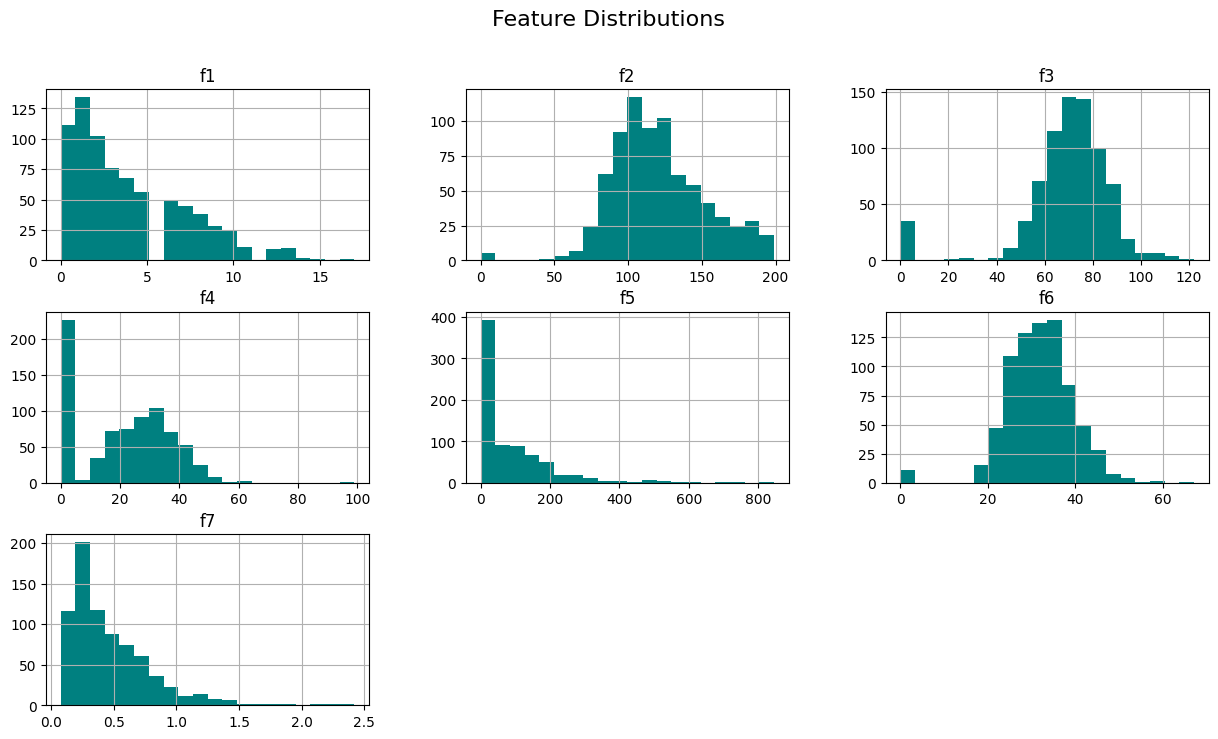

In [ ]:
df_cleaned[['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7']].hist(bins=20, figsize=(15, 8), color="teal")
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()

# Representation of each input column values on a histogram. Shows how the values are distributed. From the result, columns 'f3','f4'
# and'f6' resemble the normal distribuition curve.


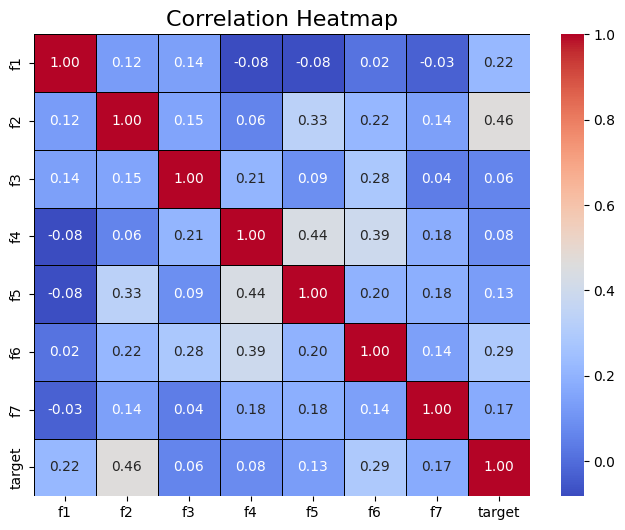

In [ ]:

plt.figure(figsize=(8,6))
corr = df_cleaned.astype(float).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f",linecolor='black', linewidths=0.7)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


# The graph below shows the correlation between feature inputs and target column with each other. For this, first we have to calculate
# the correlation matrix and then represent it using heatmap from seaborn library. We can observe from the result that correlation between
# target and f2 is highest (0.46) which means it must be an important feature to predict target. f3 and the target has lowest correlation
# value (0.06) which means it contributes very less to target variable.

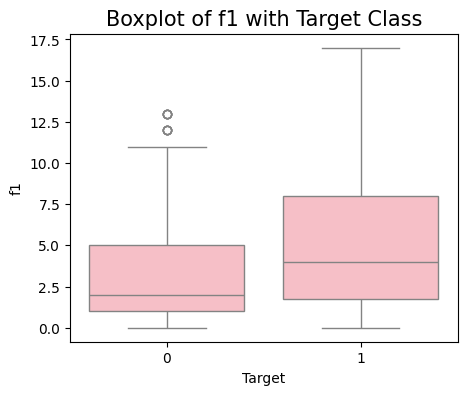

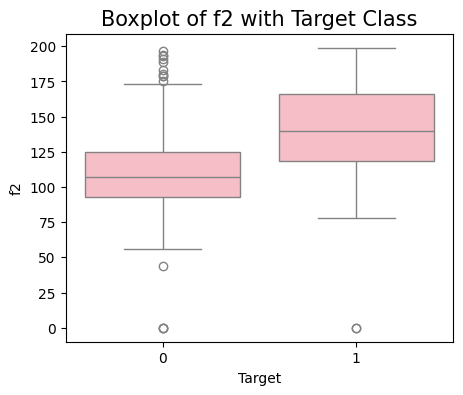

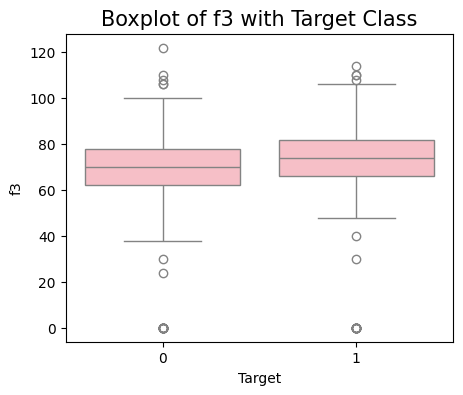

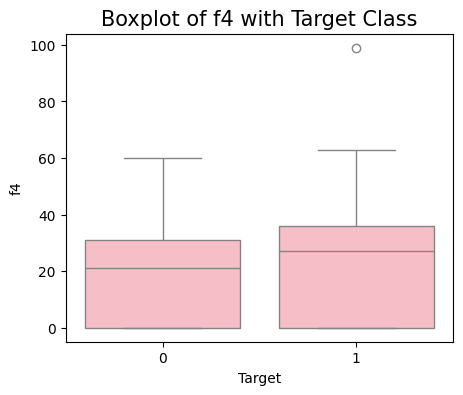

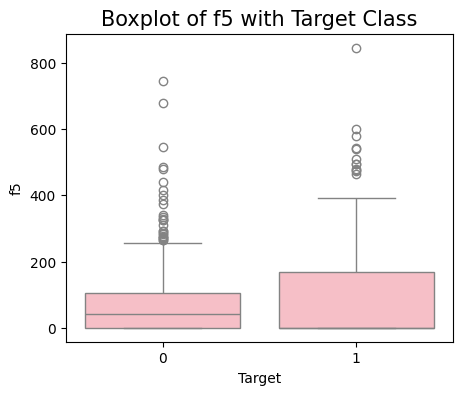

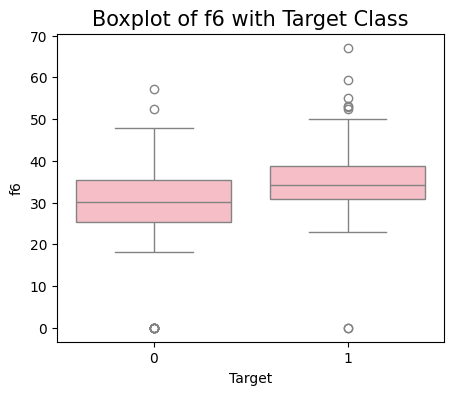

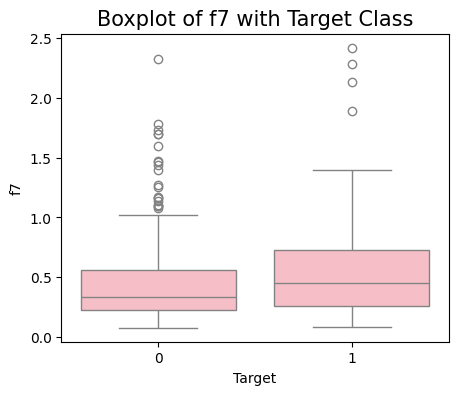

In [ ]:
for col in df_cleaned.columns:
    if col == 'target':  # skip target column
        continue

    plt.figure(figsize=(5,4))
    sns.boxplot(x='target', y=col, data=df_cleaned.astype({col: float}), color = "lightpink")
    plt.title(f'Boxplot of {col} with Target Class', fontsize=15)
    plt.xlabel('Target')
    plt.ylabel(col)
    plt.show()

    # Here we represent box plot of each column with target values (0 and 1). This will help us to identify important trends such as if
    # the value of target is 0, the value of feature input lets say f3 is higher or lower then when the value of target is 1. We have
    # created this plot for each column which will help us identify such relations in each input column with respect to target variable.
    # Additionally, we can visualise the outliers in each input column.


Preprocessing Using Standard Scaler

In [ ]:
import torch

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

print(f" Type of dataset Before: \n {df_cleaned.info()}")

#Apply standard scaling
scaler = StandardScaler()

x_scaled = scaler.fit_transform(df_cleaned.drop('target', axis=1).values)
x_tensorData = torch.tensor(x_scaled, dtype=torch.float32)
y_tensorData = torch.tensor(df_cleaned['target'].values, dtype=torch.long)

print(f"After converting to tensor type (Features): \n{x_tensorData}")

print(f" Feature Tensor type: \n{x_tensorData.dtype}")

print(f" After converting to tensor type (Target): \n{y_tensorData}")

print(f" Target Tensor type: \n{y_tensorData.dtype}")

print(f"\n Check class counts:")
print(f"Positive class: {torch.sum(y_tensorData == 1).item()}")
print(f"Negative class: {torch.sum(y_tensorData == 0).item()}")

#Found imbalance with negatives being 498 and postive less
X_np = x_tensorData.numpy()
y_np = y_tensorData.numpy()

# Apply RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled_np, y_resampled_np = ros.fit_resample(X_np, y_np)

# Converting back to tensors
X_resampled = torch.tensor(X_resampled_np, dtype=torch.float32)
y_resampled = torch.tensor(y_resampled_np, dtype=torch.long)

print(f"\n After RandomOverSampler:")
print(f"Positive class: {torch.sum(y_resampled == 1).item()}")
print(f"Negative class: {torch.sum(y_resampled == 0).item()}")

#Now we have datasets where target is equally distributed


#In our data set before preprocessing we had converted all categorical colums to numerical colums
#and based on that we could apply either standardscaling or normalization. We have choosen standarscaling as
#we are planning to take the standard deviation and its helps fit the data, Also we have handled imbalance data
#however it was optional , since we compared and checked we could see major distribution towards negative classes and hence
#applied randomoversampler

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766 entries, 0 to 765
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      766 non-null    float64
 1   f2      766 non-null    float64
 2   f3      766 non-null    int64  
 3   f4      766 non-null    float64
 4   f5      766 non-null    float64
 5   f6      766 non-null    float64
 6   f7      766 non-null    float64
 7   target  766 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 48.0 KB
 Type of dataset Before: 
 None
After converting to tensor type (Features): 
tensor([[ 0.6385,  0.8492,  0.1488,  ..., -0.6945,  0.2031,  0.4681],
        [-0.8454, -1.1253, -0.1611,  ..., -0.6945, -0.6844, -0.3654],
        [ 1.2321,  1.9462, -0.2643,  ..., -0.6945, -1.1027,  0.6040],
        ...,
        [-0.5486,  0.0343,  0.0455,  ..., -0.3821,  0.6088, -0.3986],
        [-0.2518,  0.0030,  0.1488,  ...,  0.2774, -0.7351, -0.6855],
        [-0.8454,  0.1597, -0.4709,

In [ ]:
import random

seed_value = 42

def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)

set_seed(seed_value)

Splitting the dataset

In [ ]:
from sklearn.model_selection import train_test_split

#Splitting the intial data into train and test
X_main, X_test, y_main, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=seed_value,stratify=y_resampled)


print(f"Shape of X_main: {X_main.shape}")
print(f"Shape of y_main: {y_main.shape}")

print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

#Now splitting training data again into validation

X_train, X_val, y_train, y_val = train_test_split(X_main, y_main, test_size=0.2, random_state=seed_value,stratify=y_main)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")

print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of y_val: {y_val.shape}")


import sklearn
print(sklearn.__version__)


Shape of X_main: torch.Size([796, 7])
Shape of y_main: torch.Size([796])
Shape of X_test: torch.Size([200, 7])
Shape of y_test: torch.Size([200])
Shape of X_train: torch.Size([636, 7])
Shape of y_train: torch.Size([636])
Shape of X_val: torch.Size([160, 7])
Shape of y_val: torch.Size([160])
1.6.1


 Defining the Neural Network


In [ ]:
!pip install torchinfo


In [ ]:
import torch
import torch.nn as nn
from torchinfo import summary

class NeuralNet(nn.Module):
    def __init__(self, input_dim=7):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.output = nn.Linear(64, 1)
        #self.output = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        #x = self.output(x)  # no sigmoid here!
        x = self.sigmoid(self.output(x))  # binary classification output
        return x

model = NeuralNet(input_dim=7)

print(model)

summary(model, input_size=(1, 7))

#There are total 7 input neurons because there are 7 input features and 1 output neuron with value either 0 or 1,
#which reflects our target. Activation function in Hidden layers is relu whereas in ouput layer, it is Sigmoid
#We have 2 hidden layers (fc1: 7->128 neurons and fc2 128->64). We have implemented dropout of rate 0.5%.


NeuralNet(
  (fc1): Linear(in_features=7, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
  (dropout): Dropout(p=0.5, inplace=False)
)


Layer (type:depth-idx)                   Output Shape              Param #
NeuralNet                                [1, 1]                    --
├─Linear: 1-1                            [1, 128]                  1,024
├─ReLU: 1-2                              [1, 128]                  --
├─Dropout: 1-3                           [1, 128]                  --
├─Linear: 1-4                            [1, 64]                   8,256
├─ReLU: 1-5                              [1, 64]                   --
├─Dropout: 1-6                           [1, 64]                   --
├─Linear: 1-7                            [1, 1]                    65
├─Sigmoid: 1-8                           [1, 1]                    --
Total params: 9,345
Trainable params: 9,345
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.01
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.04
Estimated Total Size (MB): 0.04

Training the neural network

In [ ]:
import torch.nn as nn
import torch.optim as optim

lossFunction = nn.BCELoss()
print('Loss function : ',lossFunction)


optimiser = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-5)

print('Optimiser : ',optimiser)


Loss function :  BCELoss()
Optimiser :  Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0001
    maximize: False
    weight_decay: 1e-05
)


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

model = model.to(device)
lossFunction = lossFunction.to(device)

X_train, y_train = to_device((X_train, y_train), device)
X_val, y_val = to_device((X_val, y_val), device)
X_test, y_test = to_device((X_test, y_test), device)


Using device: cuda


In [ ]:

import time
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

Path = "a2_part1_weights_rajagop6_dikshant"
best_model_score = float('inf')

numberOfEpochs = 200

batchSize = 32


batchToProcess = (len(X_train)+batchSize-1) // batchSize
#Above includes all the features present in the batch so that none gets dropped


train_loss_list = []
val_loss_list = []
test_loss_list = []

start_time = time.time()
print(f"Batch to process at a go: {batchToProcess}")


train_acc_list = []
val_acc_list = []
test_acc_list = []

g = torch.Generator()
g.manual_seed(seed_value)

for epoch in range(numberOfEpochs):
  epoch_train_loss = 0.0
  perm = torch.randperm(X_train.size(0),generator=g)
  X_train = X_train[perm]
  #print('Suffling X : ',X_train)
  y_train = y_train[perm]
  #print('Suffling Y: ',y_train)
  for i in range(batchToProcess):
    X_train_batch = X_train[i*batchSize:(i*batchSize)+batchSize]
    y_train_batch = y_train[i*batchSize:(i*batchSize)+batchSize]


    outputs = model(X_train_batch)
    loss = lossFunction(outputs.squeeze(),y_train_batch.float())
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

    epoch_train_loss += loss.item()

    # print(f"Epoch at current step:{epoch+1} and loss: {loss.item()}")

  avg_train_loss = epoch_train_loss / batchToProcess
  train_loss_list.append(avg_train_loss)  # append once per epoch
  print(f"Epoch {epoch+1} Average Training Loss: {avg_train_loss}")

  #calculate values for validation dataset
  model.eval()
  with torch.no_grad():
    outputs_val = model(X_val)
    loss_val = lossFunction(outputs_val.squeeze(), y_val.float())
    val_loss_list.append(loss_val.item())
    print(f"Validation loss at epoch: {epoch+1} and loss: {loss_val.item()}")


    outputs_test = model(X_test)
    loss_test = lossFunction(outputs_test.squeeze(), y_test.float())
    test_loss_list.append(loss_test.item())



    train_outputs = model(X_train)
    train_probs = torch.sigmoid(train_outputs.squeeze())
    train_preds = (train_probs >= 0.6).float()
    train_acc = accuracy_score(y_train.cpu().numpy(), train_preds.cpu().numpy())

    val_probs = torch.sigmoid(outputs_val.squeeze())
    val_preds = (val_probs >= 0.6).float()
    val_acc = accuracy_score(y_val.cpu().numpy(), val_preds.cpu().numpy())

    test_outputs = model(X_test)
    test_probs = torch.sigmoid(test_outputs.squeeze())
    test_preds = (test_probs >= 0.6).float()
    test_acc = accuracy_score(y_test.cpu().numpy(), test_preds.cpu().numpy())

    train_acc_list.append(train_acc)
    val_acc_list.append(val_acc)
    test_acc_list.append(test_acc)


    print(f"Epoch {epoch+1}/{numberOfEpochs} | "
    f"Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f} | Test Acc: {test_acc:.4f}")


    if loss_val.item() < best_model_score:
      best_model_score = loss_val.item()
      torch.save(model.state_dict(), Path)
      print(f"Model saved at epoch: {epoch+1} and loss: {best_model_score}")

  model.train() #Shifting back to original so that it runs properly for other epochs

end_time = time.time()
print(f"Ttime taken: {end_time - start_time} seconds")


Batch to process at a go: 20
Epoch 1 Average Training Loss: 0.6915101885795594
Validation loss at epoch: 1 and loss: 0.677450954914093
Epoch 1/200 | Train Acc: 0.5000 | Val Acc: 0.5000 | Test Acc: 0.5000
Model saved at epoch: 1 and loss: 0.677450954914093
Epoch 2 Average Training Loss: 0.6765748590230942
Validation loss at epoch: 2 and loss: 0.6699723601341248
Epoch 2/200 | Train Acc: 0.5000 | Val Acc: 0.5000 | Test Acc: 0.5000
Model saved at epoch: 2 and loss: 0.6699723601341248
Epoch 3 Average Training Loss: 0.6751796185970307
Validation loss at epoch: 3 and loss: 0.6634933352470398
Epoch 3/200 | Train Acc: 0.5000 | Val Acc: 0.5000 | Test Acc: 0.5000
Model saved at epoch: 3 and loss: 0.6634933352470398
Epoch 4 Average Training Loss: 0.6528821736574173
Validation loss at epoch: 4 and loss: 0.6567965745925903
Epoch 4/200 | Train Acc: 0.5016 | Val Acc: 0.5000 | Test Acc: 0.5000
Model saved at epoch: 4 and loss: 0.6567965745925903
Epoch 5 Average Training Loss: 0.6537393778562546
Validat

Evaluate the performance of the model on the testing data

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score


model.eval()
with torch.no_grad():
    y_pred_logits = model(X_test)
    y_pred_probs = torch.sigmoid(y_pred_logits.squeeze())
    y_pred_labels = (y_pred_probs >= 0.6).float()

y_true = y_test.cpu().numpy()
y_pred_labels_np = y_pred_labels.cpu().numpy()
print(y_pred_labels_np)



accuracy = accuracy_score(y_true, y_pred_labels_np)
precision, recall, f1, _ = precision_recall_fscore_support(
    y_true, y_pred_labels_np, average='binary', zero_division=0
)



[1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1.
 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0.
 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1.
 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0.
 1. 1. 1. 1. 0. 1. 1. 1.]


In [ ]:
print("=== Model Evaluation on Test Data ===")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")


=== Model Evaluation on Test Data ===
Accuracy : 0.7600
Precision: 0.7241
Recall   : 0.8400
F1 Score : 0.7778


Visualize

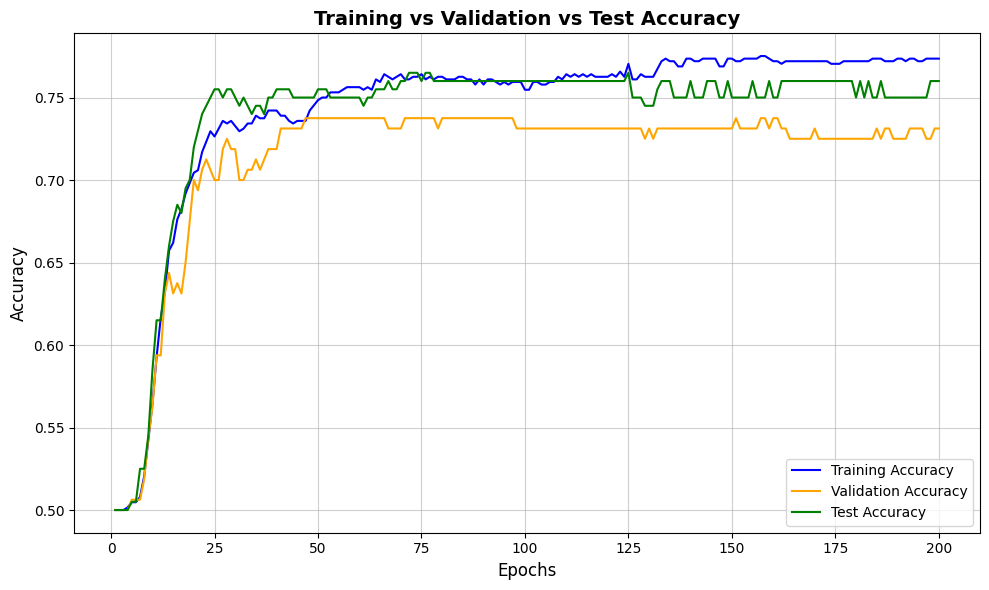

In [ ]:
epochs = np.arange(1, len(train_acc_list) + 1)

plt.figure(figsize=(10,6))
plt.plot(epochs, train_acc_list, label='Training Accuracy', color='blue')
plt.plot(epochs, val_acc_list, label='Validation Accuracy', color='orange')
plt.plot(epochs, test_acc_list, label='Test Accuracy', color='green')

plt.title('Training vs Validation vs Test Accuracy', fontsize=14, fontweight='bold')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.6)
plt.tight_layout()
plt.show()

#We can observe that the accuracy increases exponentially in the starting epochs but becomes almost stable in the
#range 50-100. This is true for all three (test, train and validation) accuracies.  Hence, early stopping might be effective
#in this case

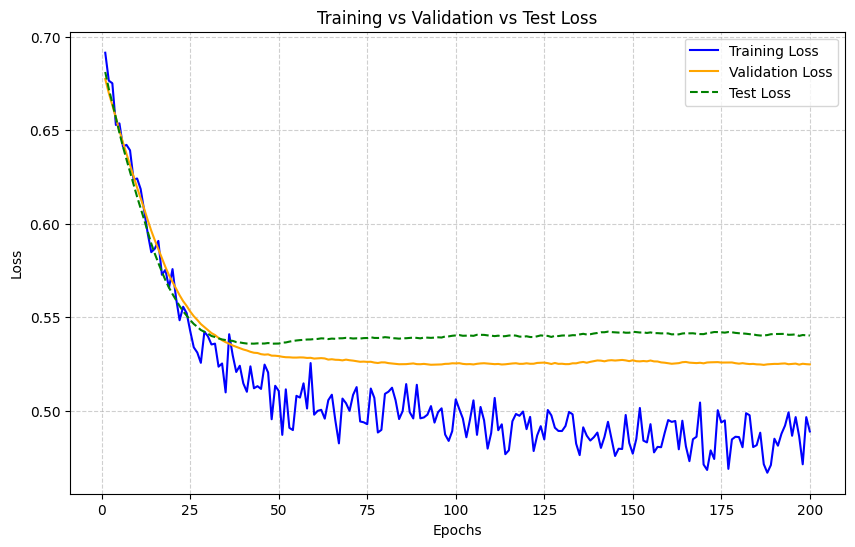

In [ ]:

plt.figure(figsize=(10,6))
plt.plot(epochs, train_loss_list, label='Training Loss', color='blue')
plt.plot(epochs, val_loss_list, label='Validation Loss', color='orange')
plt.plot(epochs, test_loss_list, label='Test Loss', color='green', linestyle='--')
plt.title('Training vs Validation vs Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#We can observe that the loss decreases rapidly in the initial epochs but test and train loss become stable after approximately 75 epochs.
#Validation loss also does not decrease significantly after 100-125 epochs.

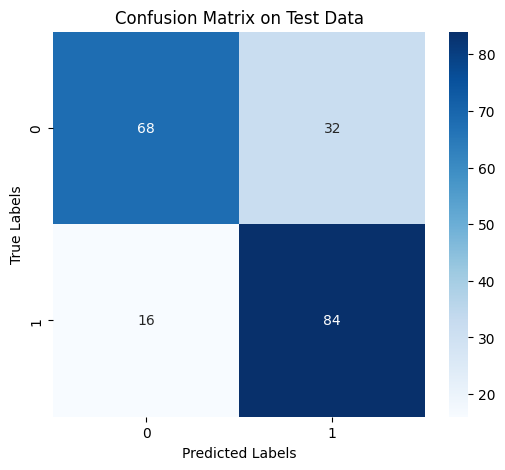

In [ ]:
from sklearn.metrics import confusion_matrix



y_true = y_test.cpu().numpy() if torch.is_tensor(y_test) else y_test
y_pred = test_preds.cpu().numpy() if torch.is_tensor(test_preds) else test_preds

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix on Test Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

AUC Score: 0.8089


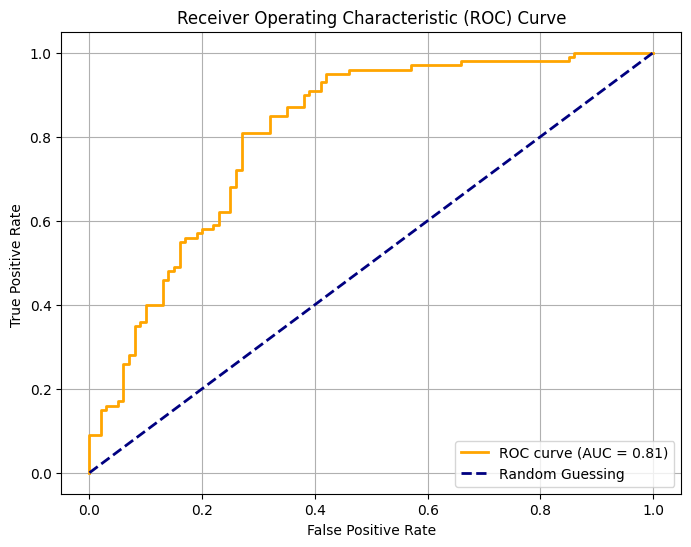

In [ ]:
y_true = y_test.cpu().numpy() if torch.is_tensor(y_test) else y_test

y_scores = test_probs.cpu().numpy() if torch.is_tensor(test_probs) else test_probs.detach().numpy()




from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = roc_auc_score(y_true, y_scores)

print(f"AUC Score: {roc_auc:.4f}")


import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate ')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


References:

1.https://seaborn.pydata.org/generated/seaborn.heatmap.html

2.https://docs.pytorch.org/docs/stable/generated/torch.nn.functional.normalize.html
3.https://docs.pytorch.org/tutorials/beginner/introyt/introyt_index.html
4. https://towardsdatascience.com/stratified-sampling-you-may-have-been-splitting-your-dataset-all-wrong-8cfdd0d32502/
5. https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html


Contribuition Table

### PART 2:

Tune Hyperparameters

In [ ]:
#Model from Step 1

class NeuralNet(nn.Module):
    def __init__(self, input_dim=7):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.output = nn.Linear(64, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        #x = self.output(x)  # no sigmoid here!
        x = self.sigmoid(self.output(x))  # binary classification output
        return x

model = NeuralNet(input_dim=7)

print(model)

summary(model, input_size=(1, 7))




NeuralNet(
  (fc1): Linear(in_features=7, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
  (dropout): Dropout(p=0.5, inplace=False)
)


Layer (type:depth-idx)                   Output Shape              Param #
NeuralNet                                [1, 1]                    --
├─Linear: 1-1                            [1, 128]                  1,024
├─ReLU: 1-2                              [1, 128]                  --
├─Dropout: 1-3                           [1, 128]                  --
├─Linear: 1-4                            [1, 64]                   8,256
├─ReLU: 1-5                              [1, 64]                   --
├─Dropout: 1-6                           [1, 64]                   --
├─Linear: 1-7                            [1, 1]                    65
├─Sigmoid: 1-8                           [1, 1]                    --
Total params: 9,345
Trainable params: 9,345
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.01
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.04
Estimated Total Size (MB): 0.04

In [ ]:

#lossFunction = nn.BCEWithLogitsLoss()
lossFunction = nn.BCELoss()
print('Loss function : ',lossFunction)


#pos_weight_val = (y_train == 0).sum() / (y_train == 1).sum()
#lossFunction = nn.BCEWithLogitsLoss(pos_weight=torch.tensor([pos_weight_val]))

lrs = [0.001,0.0001,0.01]
for lr in lrs:

  optimiser = optim.Adam(model.parameters(), lr=lr, weight_decay=1e-5)

#optimiser = torch.optim.Adam(model.parameters(), lr=0.0001,weight_decay=1e-5)
print('Optimiser : ',optimiser)


Loss function :  BCELoss()
Optimiser :  Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 1e-05
)


In [ ]:
import copy

learning_rates = [1e-2, 1e-3, 1e-4]
results = {}

initial_state = copy.deepcopy(model.state_dict())

for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")

    model.load_state_dict(initial_state)

    optimiser = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=1e-5)

    train_loss_list = []
    val_loss_list = []
    test_loss_list = []
    train_acc_list = []
    val_acc_list = []
    test_acc_list = []

    best_model_score = float('inf')

    for epoch in range(numberOfEpochs):
        epoch_train_loss = 0.0
        perm = torch.randperm(X_train.size(0))
        X_train = X_train[perm]
        y_train = y_train[perm]

        for i in range(batchToProcess):
            X_train_batch = X_train[i*batchSize:(i*batchSize)+batchSize]
            y_train_batch = y_train[i*batchSize:(i*batchSize)+batchSize]

            outputs = model(X_train_batch)
            loss = lossFunction(outputs.squeeze(), y_train_batch.float())
            optimiser.zero_grad()
            loss.backward()
            optimiser.step()

            epoch_train_loss += loss.item()

        avg_train_loss = epoch_train_loss / batchToProcess
        train_loss_list.append(avg_train_loss)

        model.eval()
        with torch.no_grad():
            outputs_val = model(X_val)
            loss_val = lossFunction(outputs_val.squeeze(), y_val.float())
            val_loss_list.append(loss_val.item())

            outputs_test = model(X_test)
            loss_test = lossFunction(outputs_test.squeeze(), y_test.float())
            test_loss_list.append(loss_test.item())

            # Accuracy calculations
            train_outputs = model(X_train)
            train_probs = torch.sigmoid(train_outputs.squeeze())
            train_preds = (train_probs >= 0.6).float()
            train_acc = accuracy_score(y_train.cpu().numpy(), train_preds.cpu().numpy())

            val_probs = torch.sigmoid(outputs_val.squeeze())
            val_preds = (val_probs >= 0.6).float()
            val_acc = accuracy_score(y_val.cpu().numpy(), val_preds.cpu().numpy())

            test_probs = torch.sigmoid(outputs_test.squeeze())
            test_preds = (test_probs >= 0.6).float()
            test_acc = accuracy_score(y_test.cpu().numpy(), test_preds.cpu().numpy())

            train_acc_list.append(train_acc)
            val_acc_list.append(val_acc)
            test_acc_list.append(test_acc)

            print(f"Epoch {epoch+1}/{numberOfEpochs} | "
                  f"Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f} | Test Acc: {test_acc:.4f}")

            # Save best model per lr
            # if loss_val.item() < best_model_score:
            #     best_model_score = loss_val.item()
            #     torch.save(model.state_dict(), f"{Path}_lr{lr}.pt")
            #     print(f"Model saved for lr={lr} at epoch {epoch+1}, val loss={best_model_score}")

        model.train()

    results[lr] = {
        'train_loss': train_loss_list,
        'val_loss': val_loss_list,
        'test_loss': test_loss_list,
        'train_acc': train_acc_list,
        'val_acc': val_acc_list,
        'test_acc': test_acc_list
    }



Training with learning rate: 0.01
Epoch 1/200 | Train Acc: 0.7563 | Val Acc: 0.7438 | Test Acc: 0.7550
Epoch 2/200 | Train Acc: 0.7469 | Val Acc: 0.7125 | Test Acc: 0.7050
Epoch 3/200 | Train Acc: 0.7421 | Val Acc: 0.6937 | Test Acc: 0.7450
Epoch 4/200 | Train Acc: 0.7531 | Val Acc: 0.7125 | Test Acc: 0.7550
Epoch 5/200 | Train Acc: 0.7642 | Val Acc: 0.7250 | Test Acc: 0.7650
Epoch 6/200 | Train Acc: 0.7752 | Val Acc: 0.7125 | Test Acc: 0.7300
Epoch 7/200 | Train Acc: 0.7594 | Val Acc: 0.7125 | Test Acc: 0.7450
Epoch 8/200 | Train Acc: 0.7925 | Val Acc: 0.7125 | Test Acc: 0.7300
Epoch 9/200 | Train Acc: 0.7956 | Val Acc: 0.7188 | Test Acc: 0.7300
Epoch 10/200 | Train Acc: 0.7720 | Val Acc: 0.7125 | Test Acc: 0.7350
Epoch 11/200 | Train Acc: 0.7720 | Val Acc: 0.7375 | Test Acc: 0.7450
Epoch 12/200 | Train Acc: 0.7767 | Val Acc: 0.7250 | Test Acc: 0.7750
Epoch 13/200 | Train Acc: 0.7799 | Val Acc: 0.7125 | Test Acc: 0.7450
Epoch 14/200 | Train Acc: 0.7720 | Val Acc: 0.7250 | Test Acc: 0

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score


model.eval()
with torch.no_grad():
    y_pred_logits = model(X_test)
    y_pred_probs = torch.sigmoid(y_pred_logits.squeeze())
    y_pred_labels = (y_pred_probs >= 0.6).float()

y_true = y_test.cpu().numpy()
y_pred_labels_np = y_pred_labels.cpu().numpy()



accuracy = accuracy_score(y_true, y_pred_labels_np)
precision, recall, f1, _ = precision_recall_fscore_support(
    y_true, y_pred_labels_np, average='binary', zero_division=0
)



In [ ]:
#Results for different learning rate values
for lr, metrics in results.items():
    print(f"\nLearning rate: {lr}")
    print(f"  Final Train Loss: {metrics['train_loss'][-1]:.4f}")
    print(f"  Final Val Loss:   {metrics['val_loss'][-1]:.4f}")
    print(f"  Final Test Loss:  {metrics['test_loss'][-1]:.4f}")
    print(f"  Final Train Acc:  {metrics['train_acc'][-1]:.4f}")
    print(f"  Final Val Acc:    {metrics['val_acc'][-1]:.4f}")
    print(f"  Final Test Acc:   {metrics['test_acc'][-1]:.4f}")



Learning rate: 0.01
  Final Train Loss: 0.3351
  Final Val Loss:   0.7028
  Final Test Loss:  1.1812
  Final Train Acc:  0.8899
  Final Val Acc:    0.7188
  Final Test Acc:   0.7500

Learning rate: 0.001
  Final Train Loss: 0.3905
  Final Val Loss:   0.5514
  Final Test Loss:  0.5713
  Final Train Acc:  0.8459
  Final Val Acc:    0.7250
  Final Test Acc:   0.7550

Learning rate: 0.0001
  Final Train Loss: 0.4864
  Final Val Loss:   0.5337
  Final Test Loss:  0.5585
  Final Train Acc:  0.7720
  Final Val Acc:    0.7125
  Final Test Acc:   0.7300


Now with different layers

In [ ]:
class DynamicNet(nn.Module):
    def __init__(self, input_layer, hidden_layer, output_dim):
        super(DynamicNet, self).__init__()
        layers = []
        prev_dim = input_layer
        for h_dim in hidden_layer:
            layers.append(nn.Linear(prev_dim, h_dim))
            prev_dim = h_dim
        self.hidden_layers = nn.ModuleList(layers)
        self.output = nn.Linear(prev_dim, output_dim)
        self.relu = nn.ReLU()

    def forward(self, x):
        for layer in self.hidden_layers:
            x = self.relu(layer(x))
        return torch.sigmoid(self.output(x))


model = DynamicNet(input_layer=7, hidden_layer=[256, 64, 32], output_dim=1)
model2 = DynamicNet(input_layer=7, hidden_layer=[64, 32], output_dim=1)
model3 = DynamicNet(input_layer=7, hidden_layer=[128, 64], output_dim=1)
print('Model 1')
print(summary(model, input_size=(1, 7)))
print('\n Model 2')
print(summary(model2, input_size=(1, 7)))
print('\n Model 3')
print(summary(model3, input_size=(1, 7)))


Model 1
Layer (type:depth-idx)                   Output Shape              Param #
DynamicNet                               [1, 1]                    --
├─ModuleList: 1-5                        --                        (recursive)
│    └─Linear: 2-1                       [1, 256]                  2,048
├─ReLU: 1-2                              [1, 256]                  --
├─ModuleList: 1-5                        --                        (recursive)
│    └─Linear: 2-2                       [1, 64]                   16,448
├─ReLU: 1-4                              [1, 64]                   --
├─ModuleList: 1-5                        --                        (recursive)
│    └─Linear: 2-3                       [1, 32]                   2,080
├─ReLU: 1-6                              [1, 32]                   --
├─Linear: 1-7                            [1, 1]                    33
Total params: 20,609
Trainable params: 20,609
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.02


In [ ]:
import torch.nn as nn
import torch.optim as optim

#lossFunction = nn.BCEWithLogitsLoss()
lossFunction = nn.BCELoss()
print('Loss function : ',lossFunction)


Loss function :  BCELoss()


In [ ]:
import copy
import torch
from sklearn.metrics import accuracy_score

# Define your models here
models = {
    "Model 1": model,
    "Model 2": model2,
    "Model 3": model3
}

results = {}  # to store train/val/test losses & acc per model

for model_name, model in models.items():
    print(f"\n--------Training {model_name}-----------")

    # Save a copy of initial model weights so you can re-initialize if needed
    initial_state = copy.deepcopy(model.state_dict())

    optimiser = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)  # single LR used for all models
    best_model_score = float('inf')

    train_loss_list = []
    val_loss_list = []
    test_loss_list = []
    train_acc_list = []
    val_acc_list = []
    test_acc_list = []

    for epoch in range(numberOfEpochs):
        epoch_train_loss = 0.0

        # Shuffle training data
        perm = torch.randperm(X_train.size(0))
        X_train = X_train[perm]
        y_train = y_train[perm]

        # Mini-batch loop
        for i in range(batchToProcess):
            X_train_batch = X_train[i * batchSize:(i + 1) * batchSize]
            y_train_batch = y_train[i * batchSize:(i + 1) * batchSize]

            outputs = model(X_train_batch)
            loss = lossFunction(outputs.squeeze(), y_train_batch.float())

            optimiser.zero_grad()
            loss.backward()
            optimiser.step()

            epoch_train_loss += loss.item()

        avg_train_loss = epoch_train_loss / batchToProcess
        train_loss_list.append(avg_train_loss)

        # Validation & testing
        model.eval()
        with torch.no_grad():
            outputs_val = model(X_val)
            loss_val = lossFunction(outputs_val.squeeze(), y_val.float())
            val_loss_list.append(loss_val.item())

            outputs_test = model(X_test)
            loss_test = lossFunction(outputs_test.squeeze(), y_test.float())
            test_loss_list.append(loss_test.item())

            # Accuracy calculations
            train_outputs = model(X_train)
            train_probs = torch.sigmoid(train_outputs.squeeze())
            train_preds = (train_probs >= 0.6).float()
            train_acc = accuracy_score(y_train.cpu().numpy(), train_preds.cpu().numpy())

            val_probs = torch.sigmoid(outputs_val.squeeze())
            val_preds = (val_probs >= 0.6).float()
            val_acc = accuracy_score(y_val.cpu().numpy(), val_preds.cpu().numpy())

            test_probs = torch.sigmoid(outputs_test.squeeze())
            test_preds = (test_probs >= 0.6).float()
            test_acc = accuracy_score(y_test.cpu().numpy(), test_preds.cpu().numpy())

            train_acc_list.append(train_acc)
            val_acc_list.append(val_acc)
            test_acc_list.append(test_acc)

            print(f"{model_name} | Epoch {epoch+1}/{numberOfEpochs} | "
                  f"Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f} | Test Acc: {test_acc:.4f}")

        model.train()

    # Store all results for this model
    results[model_name] = {
        'train_loss': train_loss_list,
        'val_loss': val_loss_list,
        'test_loss': test_loss_list,
        'train_acc': train_acc_list,
        'val_acc': val_acc_list,
        'test_acc': test_acc_list
    }

    print(f"------------- Finished training {model_name}-------------------------")



--------Training Model 1-----------
Model 1 | Epoch 1/200 | Train Acc: 0.6997 | Val Acc: 0.6687 | Test Acc: 0.7150
Model 1 | Epoch 2/200 | Train Acc: 0.7579 | Val Acc: 0.7312 | Test Acc: 0.7450
Model 1 | Epoch 3/200 | Train Acc: 0.7720 | Val Acc: 0.7500 | Test Acc: 0.7400
Model 1 | Epoch 4/200 | Train Acc: 0.7453 | Val Acc: 0.7063 | Test Acc: 0.7400
Model 1 | Epoch 5/200 | Train Acc: 0.7783 | Val Acc: 0.7500 | Test Acc: 0.7500
Model 1 | Epoch 6/200 | Train Acc: 0.7547 | Val Acc: 0.7188 | Test Acc: 0.7450
Model 1 | Epoch 7/200 | Train Acc: 0.7704 | Val Acc: 0.7375 | Test Acc: 0.7500
Model 1 | Epoch 8/200 | Train Acc: 0.7799 | Val Acc: 0.7438 | Test Acc: 0.7550
Model 1 | Epoch 9/200 | Train Acc: 0.7767 | Val Acc: 0.7000 | Test Acc: 0.7500
Model 1 | Epoch 10/200 | Train Acc: 0.7877 | Val Acc: 0.7312 | Test Acc: 0.7300
Model 1 | Epoch 11/200 | Train Acc: 0.7846 | Val Acc: 0.7375 | Test Acc: 0.7500
Model 1 | Epoch 12/200 | Train Acc: 0.7862 | Val Acc: 0.7250 | Test Acc: 0.7500
Model 1 | Ep

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# Dictionary of  trained models
models = {
    "Model 1": model,
    "Model 2 ": model2,
    "Model 3": model3
}

# Dictionary to store results
test_results = {}

# Loop over each model
for model_name, model in models.items():
    model.eval()
    with torch.no_grad():
        y_pred_logits = model(X_test)
        y_pred_probs = torch.sigmoid(y_pred_logits.squeeze())
        y_pred_labels = (y_pred_probs >= 0.6).float()

    # Convert to NumPy for sklearn metrics
    y_true = y_test.cpu().numpy()
    y_pred_labels_np = y_pred_labels.cpu().numpy()

    # Compute metrics
    accuracy = accuracy_score(y_true, y_pred_labels_np)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_true, y_pred_labels_np, average='binary', zero_division=0
    )

    # Store results
    test_results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

    print(f"\n---- {model_name} Evaluation on Test Data ----")
    print(f"Accuracy : {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"F1 Score : {f1:.4f}")




---- Model 1 Evaluation on Test Data ----
Accuracy : 0.7750
Precision: 0.7391
Recall   : 0.8500
F1 Score : 0.7907

---- Model 2  Evaluation on Test Data ----
Accuracy : 0.7800
Precision: 0.7414
Recall   : 0.8600
F1 Score : 0.7963

---- Model 3 Evaluation on Test Data ----
Accuracy : 0.7750
Precision: 0.7391
Recall   : 0.8500
F1 Score : 0.7907


3rd Hyperparameter - Batch size

In [ ]:
#Taking the model from the step 1 and 2 as base
#Model 2
#Learning rate as 0.001

class DynamicNet(nn.Module):
    def __init__(self, input_layer, hidden_layer, output_dim):
        super(DynamicNet, self).__init__()
        layers = []
        prev_dim = input_layer
        for h_dim in hidden_layer:
            layers.append(nn.Linear(prev_dim, h_dim))
            prev_dim = h_dim
        self.hidden_layers = nn.ModuleList(layers)
        self.output = nn.Linear(prev_dim, output_dim)
        self.relu = nn.ReLU()

    def forward(self, x):
        for layer in self.hidden_layers:
            x = self.relu(layer(x))
        return torch.sigmoid(self.output(x))


'''
model2 = DynamicNet(input_layer=7, hidden_layer=[64, 32], output_dim=1)
print('\n Model 2')
print(summary(model2, input_size=(1, 7)))
'''

"\nmodel2 = DynamicNet(input_layer=7, hidden_layer=[64, 32], output_dim=1)\nprint('\n Model 2')\nprint(summary(model2, input_size=(1, 7)))\n"

In [ ]:
import torch.nn as nn
import torch.optim as optim

#lossFunction = nn.BCEWithLogitsLoss()
lossFunction = nn.BCELoss()
print('Loss function : ',lossFunction)


Loss function :  BCELoss()


In [ ]:
import copy
import torch
import torch.nn as nn
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

seed = 34
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)

numberOfEpochs = 200

# Batch sizes
batchSizes = {
    "batchSize 1": 32,
    "batchSize 2": 35,
    "batchSize 3": 45
}

base_results = {}      # store train/val/test losses & accuracies per model
base_test_results = {} # store final test metrics

# Loop over batch sizes
for batchname, batchsize in batchSizes.items():

    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

    print(f"\n-------- Training with {batchname} ({batchsize}) --------")

    # Create a new model instance for each batch size
    model2 = DynamicNet(input_layer=7, hidden_layer=[64, 32], output_dim=1).to(device)
    lossFunction = nn.BCELoss().to(device)
    lossFunction = nn.BCELoss()

    train_loss_list, val_loss_list, test_loss_list = [], [], []
    train_acc_list, val_acc_list, test_acc_list = [], [], []

    num_batches = (len(X_train) + batchsize - 1) // batchsize

    for epoch in range(numberOfEpochs):
        model2.train()
        epoch_train_loss = 0.0

        # Shuffle training data
        perm = torch.randperm(X_train.size(0))
        X_train_shuffled = X_train[perm]
        y_train_shuffled = y_train[perm]

        # Mini-batch training
        for i in range(num_batches):
            X_batch = X_train_shuffled[i * batchsize:(i + 1) * batchsize].to(device)
            y_batch = y_train_shuffled[i * batchsize:(i + 1) * batchsize].to(device)

            outputs = model2(X_batch)
            loss = lossFunction(outputs.squeeze(), y_batch.float())

            optimiser.zero_grad()
            loss.backward()
            optimiser.step()

            epoch_train_loss += loss.item()

        train_loss_list.append(epoch_train_loss / num_batches)

        # Validation & test evaluation
        model2.eval()
        with torch.no_grad():
            # Validation
            val_outputs = model2(X_val)
            val_loss = lossFunction(val_outputs.squeeze(), y_val.float()).item()
            val_loss_list.append(val_loss)
            val_preds = (torch.sigmoid(val_outputs.squeeze()) >= 0.6).float()
            val_acc = accuracy_score(y_val.cpu().numpy(), val_preds.cpu().numpy())
            val_acc_list.append(val_acc)

            # Test
            test_outputs = model2(X_test)
            test_loss = lossFunction(test_outputs.squeeze(), y_test.float()).item()
            test_loss_list.append(test_loss)
            test_preds = (torch.sigmoid(test_outputs.squeeze()) >= 0.6).float()
            test_acc = accuracy_score(y_test.cpu().numpy(), test_preds.cpu().numpy())
            test_acc_list.append(test_acc)

        print(f"Epoch {epoch+1}/{numberOfEpochs} | Train Loss: {train_loss_list[-1]:.4f} "
              f"| Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f} | Test Acc: {test_acc:.4f}")

    # Store epoch metrics
    base_results[batchname] = {
        'train_loss': train_loss_list,
        'val_loss': val_loss_list,
        'test_loss': test_loss_list,
        'val_acc': val_acc_list,
        'test_acc': test_acc_list
    }

    # Compute final test metrics
    model2.eval()
    with torch.no_grad():
        y_test_pred_probs = torch.sigmoid(model2(X_test).squeeze())
        y_test_pred_labels = (y_test_pred_probs >= 0.6).float()
        y_true = y_test.cpu().numpy()
        y_pred_np = y_test_pred_labels.cpu().numpy()

        accuracy = accuracy_score(y_true, y_pred_np)
        precision, recall, f1, _ = precision_recall_fscore_support(
            y_true, y_pred_np, average='binary', zero_division=0
        )

    base_test_results[batchname] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

    print(f"\n---- {batchname} Evaluation on Test Data ----")
    print(f"Accuracy : {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"F1 Score : {f1:.4f}")


-------- Training with batchSize 1 (32) --------
Epoch 1/200 | Train Loss: 0.7041 | Val Loss: 0.7032 | Val Acc: 0.4938 | Test Acc: 0.5000
Epoch 2/200 | Train Loss: 0.7040 | Val Loss: 0.7032 | Val Acc: 0.4938 | Test Acc: 0.5000
Epoch 3/200 | Train Loss: 0.7041 | Val Loss: 0.7032 | Val Acc: 0.4938 | Test Acc: 0.5000
Epoch 4/200 | Train Loss: 0.7040 | Val Loss: 0.7032 | Val Acc: 0.4938 | Test Acc: 0.5000
Epoch 5/200 | Train Loss: 0.7043 | Val Loss: 0.7032 | Val Acc: 0.4938 | Test Acc: 0.5000
Epoch 6/200 | Train Loss: 0.7042 | Val Loss: 0.7032 | Val Acc: 0.4938 | Test Acc: 0.5000
Epoch 7/200 | Train Loss: 0.7042 | Val Loss: 0.7032 | Val Acc: 0.4938 | Test Acc: 0.5000
Epoch 8/200 | Train Loss: 0.7042 | Val Loss: 0.7032 | Val Acc: 0.4938 | Test Acc: 0.5000
Epoch 9/200 | Train Loss: 0.7040 | Val Loss: 0.7032 | Val Acc: 0.4938 | Test Acc: 0.5000
Epoch 10/200 | Train Loss: 0.7043 | Val Loss: 0.7032 | Val Acc: 0.4938 | Test Acc: 0.5000
Epoch 11/200 | Train Loss: 0.7040 | Val Loss: 0.7032 | Val 

K-FOLD METHOD

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

numberOfEpochs = 200
batch_size = 45  # fixed batch size
k_folds = 5      # number of folds

results = {}      # store train/val losses & accuracies per fold
test_results = {} # store final test metrics per fold

kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
    # Split the data
    X_train_fold = X_train[train_idx].to(device)
    y_train_fold = y_train[train_idx].to(device)
    X_val_fold = X_train[val_idx].to(device)
    y_val_fold = y_train[val_idx].to(device)
    X_test_device = X_test.to(device)
    y_test_device = y_test.to(device)


    # Initialize a new model for each fold
    model = DynamicNet(input_layer=7, hidden_layer=[64, 32], output_dim=1).to(device)
    optimiser = torch.optim.Adam(model.parameters(), lr=1e-3)
    lossFunction = nn.BCELoss()

    train_loss_list, val_loss_list = [], []
    val_acc_list = []

    num_batches = (len(X_train_fold) + batch_size - 1) // batch_size

    for epoch in range(numberOfEpochs):
        model.train()
        epoch_train_loss = 0.0

        # Shuffle training data
        perm = torch.randperm(X_train_fold.size(0))
        X_train_shuffled = X_train_fold[perm]
        y_train_shuffled = y_train_fold[perm]


        for i in range(num_batches):
            X_batch = X_train_shuffled[i * batch_size:(i + 1) * batch_size]
            y_batch = y_train_shuffled[i * batch_size:(i + 1) * batch_size]

            outputs = model(X_batch)
            loss = lossFunction(outputs.squeeze(), y_batch.float())

            optimiser.zero_grad()
            loss.backward()
            optimiser.step()

            epoch_train_loss += loss.item()

        train_loss_list.append(epoch_train_loss / num_batches)

        # Validation
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val_fold)
            val_loss = lossFunction(val_outputs.squeeze(), y_val_fold.float()).item()
            val_loss_list.append(val_loss)
            val_preds = (torch.sigmoid(val_outputs.squeeze()) >= 0.6).float()
            val_acc = accuracy_score(y_val_fold.cpu().numpy(), val_preds.cpu().numpy())
            val_acc_list.append(val_acc)

    # Store values per fold
    results[f"Fold {fold+1}"] = {
        'train_loss': train_loss_list,
        'val_loss': val_loss_list,
        'val_acc': val_acc_list
    }

    # Evaluate on the test set
    model.eval()
    with torch.no_grad():
        y_test_pred_probs = torch.sigmoid(model(X_test_device).squeeze())
        y_test_pred_labels = (y_test_pred_probs >= 0.6).float()
        y_true = y_test_device.cpu().numpy()
        y_pred_np = y_test_pred_labels.cpu().numpy()


        accuracy = accuracy_score(y_true, y_pred_np)
        precision, recall, f1, _ = precision_recall_fscore_support(
            y_true, y_pred_np, average='binary', zero_division=0
        )

    test_results[f"Fold {fold+1}"] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

    # Print results after training for this fold
    print(f"\n----Fold {fold+1} Completed-------")
    print(f"Final Training Loss: {train_loss_list[-1]:.4f}")
    print(f"Final Validation Loss: {val_loss_list[-1]:.4f}")
    print(f"Final Validation Accuracy: {val_acc_list[-1]:.4f}")
    print(f"Test Accuracy : {accuracy:.4f}")
    print(f"Test Precision: {precision:.4f}")
    print(f"Test Recall   : {recall:.4f}")
    print(f"Test F1 Score : {f1:.4f}")



----Fold 1 Completed-------
Final Training Loss: 0.1555
Final Validation Loss: 0.6753
Final Validation Accuracy: 0.7812
Test Accuracy : 0.7300
Test Precision: 0.7091
Test Recall   : 0.7800
Test F1 Score : 0.7429

----Fold 2 Completed-------
Final Training Loss: 0.1768
Final Validation Loss: 0.5205
Final Validation Accuracy: 0.7717
Test Accuracy : 0.7750
Test Precision: 0.7477
Test Recall   : 0.8300
Test F1 Score : 0.7867

----Fold 3 Completed-------
Final Training Loss: 0.1329
Final Validation Loss: 0.9522
Final Validation Accuracy: 0.7087
Test Accuracy : 0.7950
Test Precision: 0.7658
Test Recall   : 0.8500
Test F1 Score : 0.8057

----Fold 4 Completed-------
Final Training Loss: 0.1450
Final Validation Loss: 0.7669
Final Validation Accuracy: 0.7638
Test Accuracy : 0.7700
Test Precision: 0.7328
Test Recall   : 0.8500
Test F1 Score : 0.7870

----Fold 5 Completed-------
Final Training Loss: 0.1360
Final Validation Loss: 0.6329
Final Validation Accuracy: 0.7402
Test Accuracy : 0.7850
Test

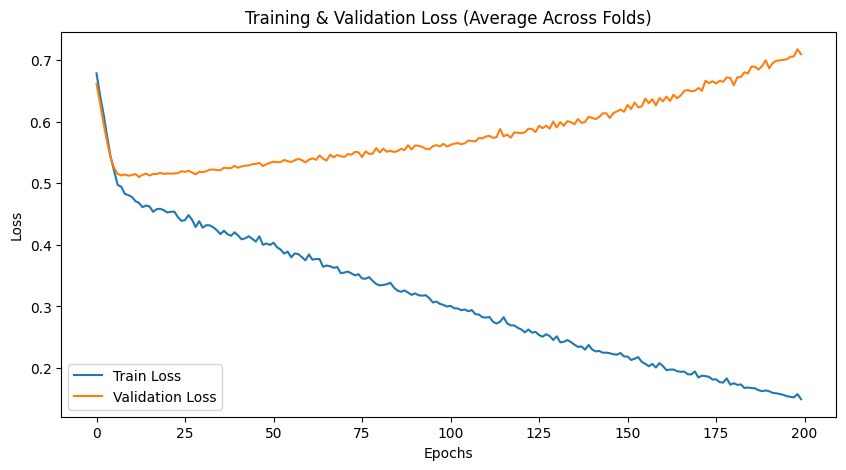

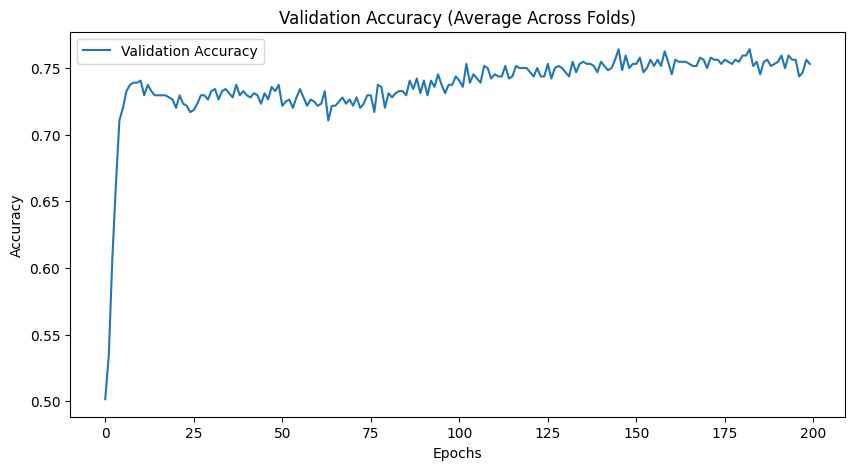

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#Make a list of losses and thee accuracies
train_loss_all = np.array([results[f]['train_loss'] for f in results])
val_loss_all   = np.array([results[f]['val_loss'] for f in results])
val_acc_all    = np.array([results[f]['val_acc'] for f in results])


# Compute mean across folds
train_loss_mean = np.mean(train_loss_all, axis=0)
#val_loss_mean   = np.mean(val_loss_all, axis=)
val_loss_mean   = np.mean(val_loss_all, axis=0)
val_acc_mean    = np.mean(val_acc_all, axis=0)

# Plot Train & Validation Loss
plt.figure(figsize=(10,5))
plt.plot(train_loss_mean, label='Train Loss')
plt.plot(val_loss_mean, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss (Average Across Folds)')
plt.legend()
plt.show()

# Plot Validation Accuracy
plt.figure(figsize=(10,5))
plt.plot(val_acc_mean, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy (Average Across Folds)')
plt.legend()
plt.show()


Learning rate scheduler

In [ ]:
#Importing the libraries to be on the same side
import copy
import torch
import torch.nn as nn
import numpy as np
import random
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from torch.optim.lr_scheduler import StepLR

#Defining seed to maintain stability in resuls
seed = 34
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)

numberOfEpochs = 200
batchsize = 45

results = {}
test_results = {}

print(f"\n-------- Training the Model-------")

model2 = DynamicNet(input_layer=7, hidden_layer=[64, 32], output_dim=1).to(device)
optimiser = torch.optim.Adam(model2.parameters(), lr=1e-3)
lossFunction = nn.BCELoss()

#Defining the scheduler
scheduler = StepLR(optimiser, step_size=50, gamma=0.5)

train_loss_list, val_loss_list, test_loss_list = [], [], []
train_acc_list, val_acc_list, test_acc_list = [], [], []

num_batches = (len(X_train) + batchsize - 1) // batchsize

for epoch in range(numberOfEpochs):
    model2.train()
    epoch_train_loss = 0.0
    #Keeping model 2 as it yielded the best result
    perm = torch.randperm(X_train.size(0))
    X_train_shuffled = X_train[perm]
    y_train_shuffled = y_train[perm]

    for i in range(num_batches):
        X_batch = X_train_shuffled[i * batchsize:(i + 1) * batchsize]
        y_batch = y_train_shuffled[i * batchsize:(i + 1) * batchsize]

        outputs = model2(X_batch)
        loss = lossFunction(outputs.squeeze(), y_batch.float())

        optimiser.zero_grad()
        loss.backward()
        optimiser.step()

        epoch_train_loss += loss.item()

    scheduler.step()
    train_loss_list.append(epoch_train_loss / num_batches)

    model2.eval()
    with torch.no_grad():
        val_outputs = model2(X_val)
        val_loss = lossFunction(val_outputs.squeeze(), y_val.float()).item()
        val_loss_list.append(val_loss)
        val_preds = (torch.sigmoid(val_outputs.squeeze()) >= 0.6).float()
        val_acc = accuracy_score(y_val.cpu().numpy(), val_preds.cpu().numpy())
        val_acc_list.append(val_acc)

        test_outputs = model2(X_test)
        test_loss = lossFunction(test_outputs.squeeze(), y_test.float()).item()
        test_loss_list.append(test_loss)
        test_preds = (torch.sigmoid(test_outputs.squeeze()) >= 0.6).float()
        test_acc = accuracy_score(y_test.cpu().numpy(), test_preds.cpu().numpy())
        test_acc_list.append(test_acc)

    if (epoch + 1) % 10 == 0 or epoch == 0:
        current_lr = scheduler.get_last_lr()[0]
        print(f"Epoch {epoch+1}/{numberOfEpochs} | LR: {current_lr:.6f} "
              f"| Train Loss: {train_loss_list[-1]:.4f} "
              f"| Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f} | Test Acc: {test_acc:.4f}")

#Storing the values
results = {
    'train_loss': train_loss_list,
    'val_loss': val_loss_list,
    'test_loss': test_loss_list,
    'val_acc': val_acc_list,
    'test_acc': test_acc_list
}

model2.eval()
with torch.no_grad():
    y_test_pred_probs = torch.sigmoid(model2(X_test).squeeze())
    y_test_pred_labels = (y_test_pred_probs >= 0.6).float()
    y_true = y_test.cpu().numpy()
    y_pred_np = y_test_pred_labels.cpu().numpy()

    accuracy = accuracy_score(y_true, y_pred_np)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_true, y_pred_np, average='binary', zero_division=0
    )

test_results = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}

print(f"\nEvaluation on Test Data ----")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")



-------- Training the Model-------
Epoch 1/200 | LR: 0.001000 | Train Loss: 0.6857 | Val Loss: 0.6639 | Val Acc: 0.5000 | Test Acc: 0.5050
Epoch 10/200 | LR: 0.001000 | Train Loss: 0.4662 | Val Loss: 0.5120 | Val Acc: 0.7500 | Test Acc: 0.7400
Epoch 20/200 | LR: 0.001000 | Train Loss: 0.4580 | Val Loss: 0.5194 | Val Acc: 0.7188 | Test Acc: 0.7500
Epoch 30/200 | LR: 0.001000 | Train Loss: 0.4242 | Val Loss: 0.5201 | Val Acc: 0.7375 | Test Acc: 0.7600
Epoch 40/200 | LR: 0.001000 | Train Loss: 0.4410 | Val Loss: 0.5124 | Val Acc: 0.7500 | Test Acc: 0.7500
Epoch 50/200 | LR: 0.000500 | Train Loss: 0.4000 | Val Loss: 0.5094 | Val Acc: 0.7438 | Test Acc: 0.7650
Epoch 60/200 | LR: 0.000500 | Train Loss: 0.3910 | Val Loss: 0.5086 | Val Acc: 0.7438 | Test Acc: 0.7650
Epoch 70/200 | LR: 0.000500 | Train Loss: 0.3740 | Val Loss: 0.5021 | Val Acc: 0.7438 | Test Acc: 0.7850
Epoch 80/200 | LR: 0.000500 | Train Loss: 0.3836 | Val Loss: 0.5054 | Val Acc: 0.7438 | Test Acc: 0.7700
Epoch 90/200 | LR: 0

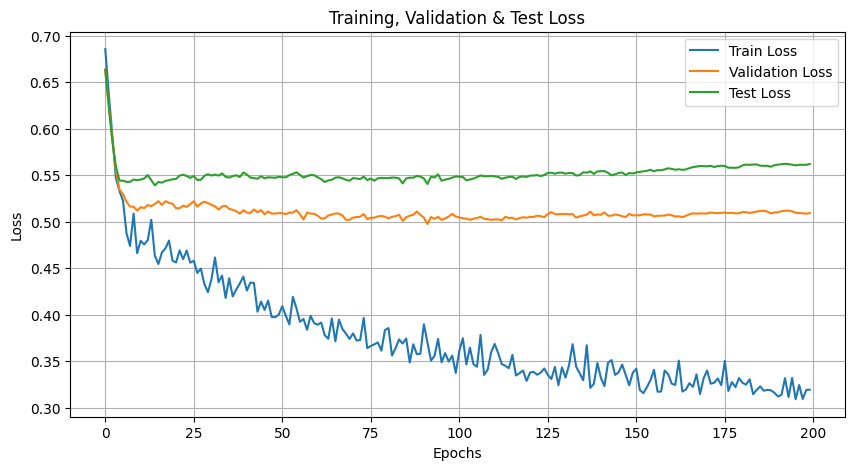

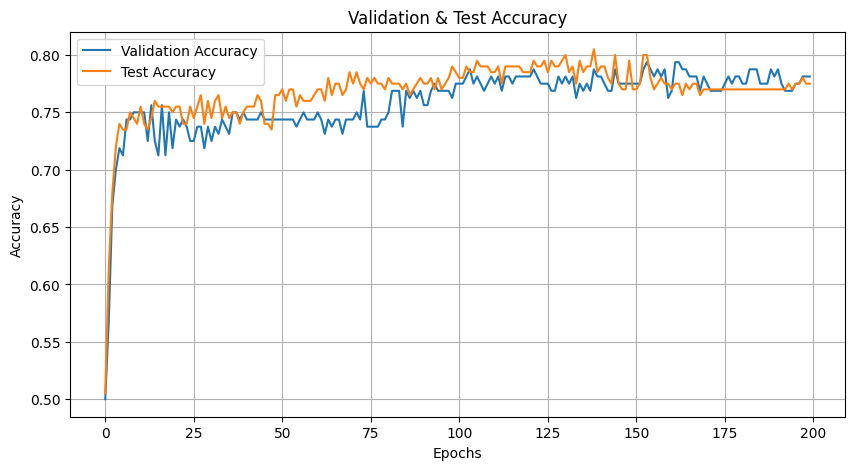

Final Test Metrics:
Accuracy: 0.78
Precision: 0.74
Recall: 0.85
F1 Score: 0.79


In [ ]:
import matplotlib.pyplot as plt

#Loss of train/val/test
plt.figure(figsize=(10,5))
plt.plot(results['train_loss'], label='Train Loss')
plt.plot(results['val_loss'], label='Validation Loss')
plt.plot(results['test_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training, Validation & Test Loss')
plt.legend()
plt.grid(True)
plt.show()

# Accuracy of Validation and test datasets
plt.figure(figsize=(10,5))
plt.plot(results['val_acc'], label='Validation Accuracy')
plt.plot(results['test_acc'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation & Test Accuracy')
plt.legend()
plt.grid(True)
plt.show()

#
print("Final Test Metrics:")
for k, v in test_results.items():
    print(f"{k}: {v:.2f}")


Early Stopping Implementation

In [ ]:

seed = 34
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)

numberOfEpochs = 200
batch_size = 32
patience = 40  # early stopping patience


model_early = DynamicNet(input_layer=7, hidden_layer=[64, 32], output_dim=1).to(device)
optimiser = torch.optim.Adam(model_early.parameters(), lr=0.001)
lossFunction = nn.BCELoss()

train_loss_list, val_loss_list = [], []
val_acc_list = []

best_val_loss = float('inf')
best_model_state = None
patience_counter = 0
best_epoch = 0

num_batches = (len(X_train) + batch_size - 1) // batch_size

for epoch in range(numberOfEpochs):
    model_early.train()
    epoch_train_loss = 0.0


    perm = torch.randperm(X_train.size(0))
    X_train_shuffled = X_train[perm]
    y_train_shuffled = y_train[perm]


    for i in range(num_batches):
        X_batch = X_train_shuffled[i * batch_size:(i + 1) * batch_size]
        y_batch = y_train_shuffled[i * batch_size:(i + 1) * batch_size]

        outputs = model_early(X_batch)
        loss = lossFunction(outputs.squeeze(), y_batch.float())

        optimiser.zero_grad()
        loss.backward()
        optimiser.step()

        epoch_train_loss += loss.item()

    avg_train_loss = epoch_train_loss / num_batches
    train_loss_list.append(avg_train_loss)

    # Validation
    model_early.eval()
    with torch.no_grad():
        val_outputs = model_early(X_val)
        val_loss = lossFunction(val_outputs.squeeze(), y_val.float()).item()
        val_loss_list.append(val_loss)
        val_preds = (torch.sigmoid(val_outputs.squeeze()) >= 0.6).float()
        val_acc = accuracy_score(y_val.cpu().numpy(), val_preds.cpu().numpy())
        val_acc_list.append(val_acc)

    # Early stopping check
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_state = model_early.state_dict().copy()
        best_epoch = epoch
        patience_counter = 0
        print(f"Epoch {epoch+1} - Train Loss: {avg_train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f} [BEST]")
    else:
        patience_counter += 1
        print(f"Epoch {epoch+1} - Train Loss: {avg_train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

        if patience_counter >= patience:
            print(f"\nEarly stopping triggered at epoch {epoch+1}")
            print(f"Best model was at epoch {best_epoch+1} with validation loss: {best_val_loss:.4f}")
            break


model_early.load_state_dict(best_model_state)


print("\nFinal Evaluation on Test Set")
model_early.eval()
with torch.no_grad():
    y_test_pred_probs = torch.sigmoid(model_early(X_test).squeeze())
    y_test_pred_labels = (y_test_pred_probs >= 0.6).float()
    y_true = y_test.cpu().numpy()
    y_pred_np = y_test_pred_labels.cpu().numpy()

    accuracy = accuracy_score(y_true, y_pred_np)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_true, y_pred_np, average='binary', zero_division=0
    )

print(f"Best Model (Epoch {best_epoch+1}):")
print(f"Test Accuracy : {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall   : {recall:.4f}")
print(f"Test F1 Score : {f1:.4f}")


Epoch 1 - Train Loss: 0.6800, Val Loss: 0.6544, Val Acc: 0.5188 [BEST]
Epoch 2 - Train Loss: 0.6234, Val Loss: 0.6046, Val Acc: 0.6312 [BEST]
Epoch 3 - Train Loss: 0.5675, Val Loss: 0.5644, Val Acc: 0.6937 [BEST]
Epoch 4 - Train Loss: 0.5252, Val Loss: 0.5346, Val Acc: 0.7250 [BEST]
Epoch 5 - Train Loss: 0.5053, Val Loss: 0.5242, Val Acc: 0.7438 [BEST]
Epoch 6 - Train Loss: 0.4907, Val Loss: 0.5225, Val Acc: 0.7250 [BEST]
Epoch 7 - Train Loss: 0.4844, Val Loss: 0.5185, Val Acc: 0.7438 [BEST]
Epoch 8 - Train Loss: 0.4809, Val Loss: 0.5170, Val Acc: 0.7500 [BEST]
Epoch 9 - Train Loss: 0.4778, Val Loss: 0.5188, Val Acc: 0.7500
Epoch 10 - Train Loss: 0.4722, Val Loss: 0.5164, Val Acc: 0.7250 [BEST]
Epoch 11 - Train Loss: 0.4707, Val Loss: 0.5206, Val Acc: 0.7188
Epoch 12 - Train Loss: 0.4674, Val Loss: 0.5156, Val Acc: 0.7500 [BEST]
Epoch 13 - Train Loss: 0.4656, Val Loss: 0.5176, Val Acc: 0.7250
Epoch 14 - Train Loss: 0.4630, Val Loss: 0.5174, Val Acc: 0.7438
Epoch 15 - Train Loss: 0.4590

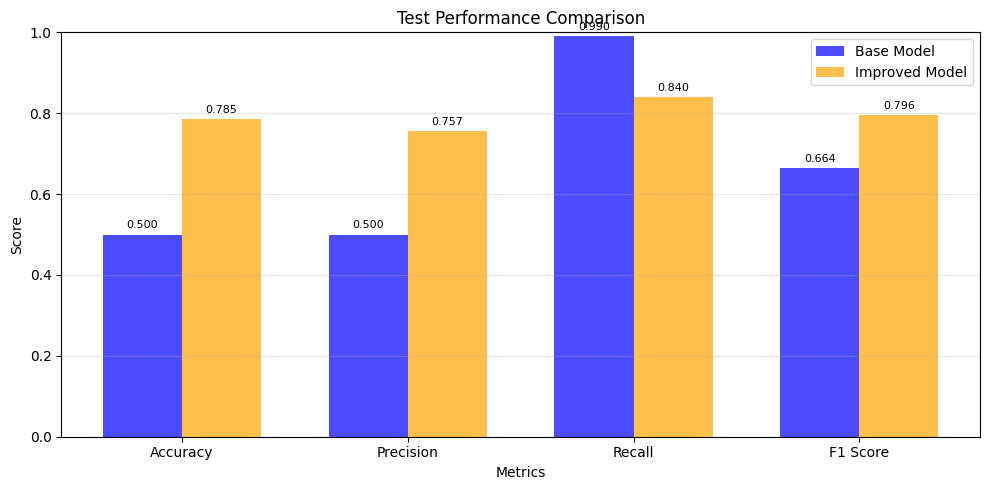

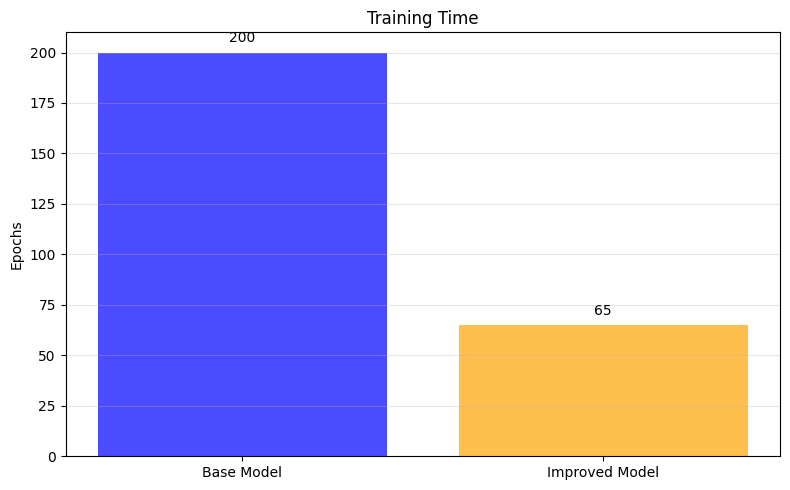

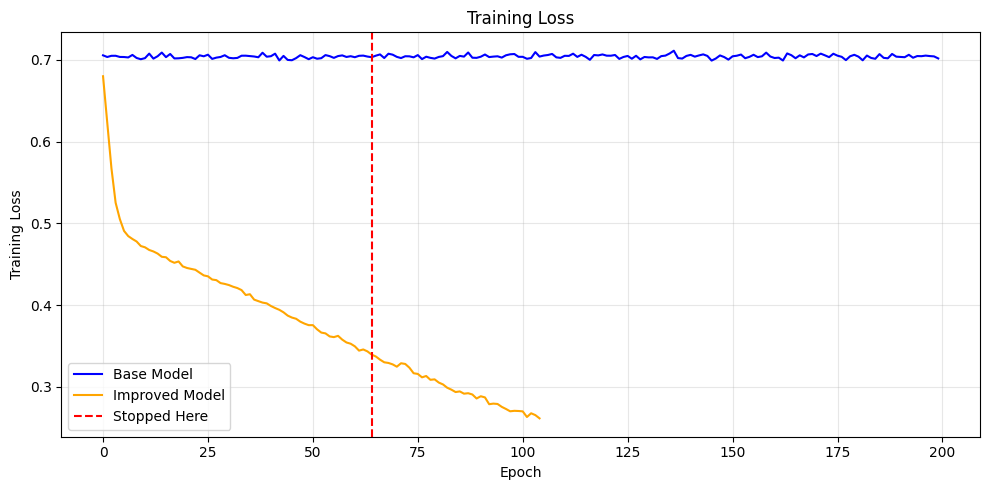

In [ ]:
base_batch45 = base_results['batchSize 3']
base_metrics = base_test_results['batchSize 3']

# Get improved model results
improved_metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

base_epochs = 200
improved_epochs = best_epoch + 1

 # Compare Test Performance
plt.figure(figsize=(10, 5))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
base_values = [base_metrics[m] for m in metrics]
improved_values = [improved_metrics[m] for m in metrics]

x = np.arange(len(metrics))
width = 0.35

bars1 = plt.bar(x - width/2, base_values, width, label='Base Model', color='blue', alpha=0.7)
bars2 = plt.bar(x + width/2, improved_values, width, label='Improved Model', color='orange', alpha=0.7)

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Test Performance Comparison')
plt.xticks(x, metrics)
plt.legend()
plt.ylim([0, 1])
plt.grid(axis='y', alpha=0.3)

# Add values on bars
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.3f}', ha='center', va='bottom', fontsize=8)
for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.3f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

# Compare Training Time
plt.figure(figsize=(8, 5))

bars = plt.bar(['Base Model', 'Improved Model'],
               [base_epochs, improved_epochs],
               color=['blue', 'orange'], alpha=0.7)

plt.ylabel('Epochs')
plt.title('Training Time')
plt.grid(axis='y', alpha=0.3)

plt.text(0, base_epochs + 5, str(base_epochs), ha='center')
plt.text(1, improved_epochs + 5, str(improved_epochs), ha='center')

plt.tight_layout()
plt.show()

# 3. Compare Training Loss
plt.figure(figsize=(10, 5))

plt.plot(base_batch45['train_loss'], label='Base Model', color='blue')
plt.plot(train_loss_list, label='Improved Model', color='orange')
plt.axvline(x=best_epoch, color='red', linestyle='--', label='Stopped Here')

plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


#Hence, we can observe that early stopping did not decrease the accuracy a lot but improved execution
# time significantly.


Batch Normalisation

In [ ]:

# Define model with Batch Normalization
class DynamicNetWithBatchNorm(nn.Module):
    def __init__(self, input_layer, hidden_layer, output_dim):
        super(DynamicNetWithBatchNorm, self).__init__()

        layers = []
        prev_size = input_layer

        for hidden_size in hidden_layer:
            layers.append(nn.Linear(prev_size, hidden_size))
            layers.append(nn.BatchNorm1d(hidden_size))  # Add Batch Normalization
            layers.append(nn.ReLU())
            prev_size = hidden_size

        layers.append(nn.Linear(prev_size, output_dim))
        layers.append(nn.Sigmoid())

        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

In [ ]:

numberOfEpochs = 200
batch_size = 45

# Initialize model with Batch Normalization
model = DynamicNetWithBatchNorm(input_layer=7, hidden_layer=[64, 32], output_dim=1).to(device)
optimiser = torch.optim.Adam(model.parameters(), lr=1e-3)


train_loss_list, val_loss_list = [], []
val_acc_list = []

num_batches = (len(X_train) + batch_size - 1) // batch_size


for epoch in range(numberOfEpochs):
    model.train()
    epoch_train_loss = 0.0

    # Shuffle training data
    perm = torch.randperm(X_train.size(0))
    X_train_shuffled = X_train[perm]
    y_train_shuffled = y_train[perm]

    # Mini-batch training
    for i in range(num_batches):
        X_batch = X_train_shuffled[i * batch_size:(i + 1) * batch_size]
        y_batch = y_train_shuffled[i * batch_size:(i + 1) * batch_size]

        outputs = model(X_batch)
        loss = lossFunction(outputs.squeeze(), y_batch.float())

        optimiser.zero_grad()
        loss.backward()
        optimiser.step()

        epoch_train_loss += loss.item()

    avg_train_loss = epoch_train_loss / num_batches
    train_loss_list.append(avg_train_loss)

    # Validation
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val)
        val_loss = lossFunction(val_outputs.squeeze(), y_val.float()).item()
        val_loss_list.append(val_loss)
        val_preds = (val_outputs.squeeze() >= 0.6).float()
        val_acc = accuracy_score(y_val.cpu().numpy(), val_preds.cpu().numpy())
        val_acc_list.append(val_acc)

    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1}/{numberOfEpochs} - Train Loss: {avg_train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")


print("\nFinal Evaluation on Test Set ")
model.eval()
with torch.no_grad():
    y_test_pred_probs = model(X_test).squeeze()
    y_test_pred_labels = (y_test_pred_probs >= 0.6).float()
    y_true = y_test.cpu().numpy()
    y_pred_np = y_test_pred_labels.cpu().numpy()

    accuracy = accuracy_score(y_true, y_pred_np)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_true, y_pred_np, average='binary', zero_division=0
    )

print(f"Test Accuracy : {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall   : {recall:.4f}")
print(f"Test F1 Score : {f1:.4f}")

# Store results
batchnorm_results = {
    'train_loss': train_loss_list,
    'val_loss': val_loss_list,
    'val_acc': val_acc_list
}

batchnorm_test_results = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}

Epoch 20/200 - Train Loss: 0.4226, Val Loss: 0.5243, Val Acc: 0.7125
Epoch 40/200 - Train Loss: 0.3747, Val Loss: 0.5480, Val Acc: 0.7000
Epoch 60/200 - Train Loss: 0.3541, Val Loss: 0.5411, Val Acc: 0.7188
Epoch 80/200 - Train Loss: 0.3209, Val Loss: 0.5626, Val Acc: 0.7312
Epoch 100/200 - Train Loss: 0.2976, Val Loss: 0.5684, Val Acc: 0.7312
Epoch 120/200 - Train Loss: 0.2802, Val Loss: 0.5862, Val Acc: 0.7250
Epoch 140/200 - Train Loss: 0.2826, Val Loss: 0.6016, Val Acc: 0.7438
Epoch 160/200 - Train Loss: 0.3097, Val Loss: 0.5863, Val Acc: 0.7188
Epoch 180/200 - Train Loss: 0.2561, Val Loss: 0.6083, Val Acc: 0.7250
Epoch 200/200 - Train Loss: 0.2795, Val Loss: 0.6326, Val Acc: 0.7688

Final Evaluation on Test Set 
Test Accuracy : 0.7600
Test Precision: 0.7766
Test Recall   : 0.7300
Test F1 Score : 0.7526


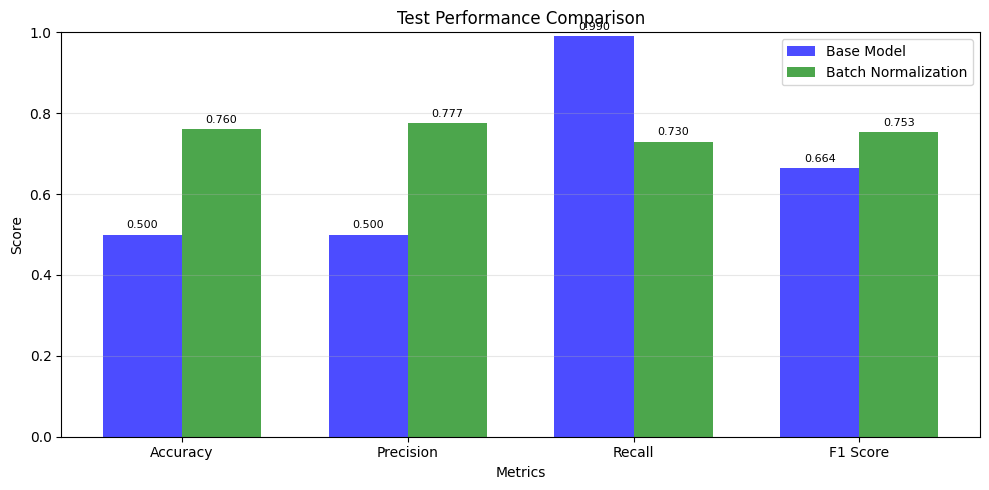

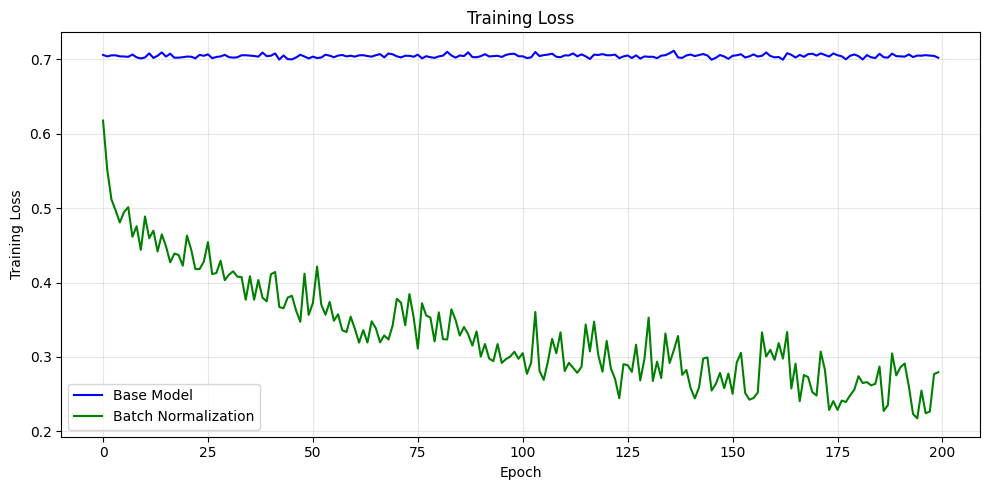

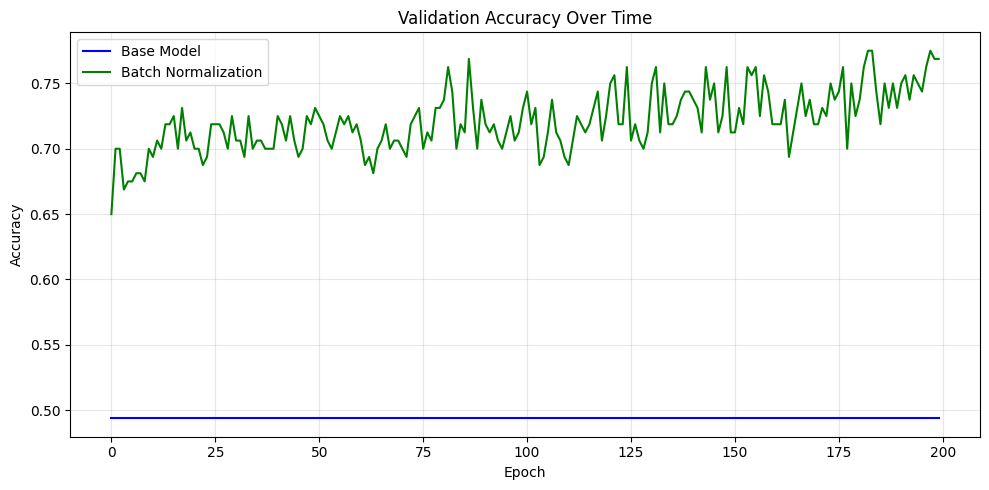

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

base_batch45 = base_results['batchSize 3']
base_metrics = base_test_results['batchSize 3']

batchnorm_metrics = batchnorm_test_results

base_epochs = 200
batchnorm_epochs = 200

# Compare Test Performance
plt.figure(figsize=(10, 5))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
base_values = [base_metrics[m] for m in metrics]
batchnorm_values = [batchnorm_metrics[m] for m in metrics]

x = np.arange(len(metrics))
width = 0.35

bars1 = plt.bar(x - width/2, base_values, width, label='Base Model', color='blue', alpha=0.7)
bars2 = plt.bar(x + width/2, batchnorm_values, width, label='Batch Normalization', color='green', alpha=0.7)

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Test Performance Comparison')
plt.xticks(x, metrics)
plt.legend()
plt.ylim([0, 1])
plt.grid(axis='y', alpha=0.3)

for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.3f}', ha='center', va='bottom', fontsize=8)
for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.3f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

# Compare Training Loss
plt.figure(figsize=(10, 5))

plt.plot(base_batch45['train_loss'], label='Base Model', color='blue')
plt.plot(batchnorm_results['train_loss'], label='Batch Normalization', color='green')

plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# Compare Validation Accuracy
plt.figure(figsize=(10, 5))

plt.plot(base_batch45['val_acc'], label='Base Model', color='blue')
plt.plot(batchnorm_results['val_acc'], label='Batch Normalization', color='green')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy Over Time')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



In [ ]:
Path = "a2_part2_weights_rajagop6_dikshant"

torch.save(model_early.state_dict(), Path)


#Hyperparameter being learning rate
| Setup   | Value | Test Accuracy |
|----------|--------|---------------|
| Setup 1  | 1e-2   | 77 |
| Setup 2  | 1e-3   | 77.50 |
| Setup 3  |1e-4    | 73.50 |

#Hyperparameter being different hidden layers
| Setup   | Value | Test Accuracy |
|----------|--------|---------------|
| Setup 1  | [256,64,32]   | 76 |
| Setup 2  | [64,32]  | 78 |
| Setup 3  |[128,64]  | 76|

#Hyperparameter being batch size
| Setup   | Value | Test Accuracy |
|----------|--------|---------------|
| Setup 1  | 32   | 79 |
| Setup 2  | 35   | 78 |
| Setup 3  | 45    | 79 |


References
1. https://docs.pytorch.org/docs/stable/generated/torch.nn.ModuleList.html

Contribuition Table
| Step | Teammate | Contribution |
|------|-----------|---------------|
| Part 1|   | |
| Step 1 | Dikshant  | 100% |
| Step 2 | Abhishek | 100 % |
| Step 3 | Dikshant  | 100%  |
| Step 4 | Abhishek | 1-5 |
| Step 4 | Abhishek | 6-7 |
| Part 2| Dikshant   | 50%|
| Part 2| Abhishek   | 50%|


### Part III: Building a CNN
Load the dataset


Importing common Libraries

In [3]:
import os
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split


Unzip first

In [5]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/datasets/cnn_dataset.zip"
#zip_path = "/content/drive/MyDrive/cnn_dataset.zip"

extract_path = "/content"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction complete")

Extraction complete


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data_dir = '/content/cnn_dataset'
dataset = datasets.ImageFolder(root=data_dir)


In [7]:
num_classes = len(dataset.classes)
num_samples = len(dataset)

print("Classes:", dataset.classes)
print("Number of classes:", num_classes)
print("Number of images:", num_samples)


Classes: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
Number of classes: 36
Number of images: 100800


Transformation

In [8]:
from PIL import ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES = True

transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [9]:
dataset = datasets.ImageFolder(root=data_dir, transform=transform)

train_loader = DataLoader(
    dataset,
    batch_size=64,
    shuffle=True,
    num_workers=4,
    pin_memory=True
)

test_loader = DataLoader(
    dataset,
    batch_size=64,
    shuffle=False,
    num_workers=4,
    pin_memory=True
)

print(type(dataset[0][0]), dataset[0][0].shape)

#These loader paramerters fasten the dataLoading into memory


<class 'torch.Tensor'> torch.Size([3, 28, 28])


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Visualisation

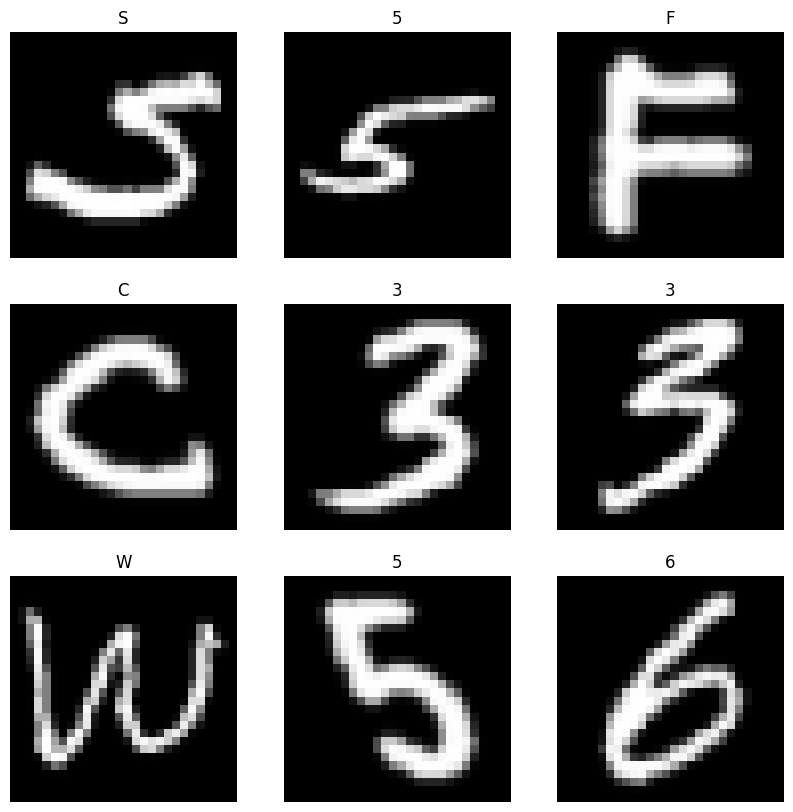

In [ ]:
def show_batch(data_loader):
    images, labels = next(iter(data_loader))
    plt.figure(figsize=(10,10))
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].permute(1, 2, 0) * 0.5 + 0.5)
        plt.title(dataset.classes[labels[i]])
        plt.axis('off')
    plt.show()

show_batch(train_loader)


CNN model architecture

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class BaseCNN(nn.Module):
    def __init__(self, num_classes=36):
        super(BaseCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(128 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, num_classes)
        self.elu = nn.ELU()

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.dropout1(x)
        x = x.view(x.size(0), -1)
        x = self.elu(self.fc1(x))
        x = self.dropout2(x)
        x = self.fc2(x)
        return x

# The above defined CNN model has total of 7 layers (including dropout) in the forward pass, including dropout.
# Input to the model is 28x28x3 (after transformation) and output is 36 neurons for 36 classes. Activation
# function used in hidden layers are elu and relu.


In [ ]:
! pip install torchinfo

Summary of your model

In [ ]:

from torchinfo import summary

model = BaseCNN(num_classes=36)

summary(model, input_size=(32, 3, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
BaseCNN                                  [32, 36]                  --
├─Conv2d: 1-1                            [32, 32, 28, 28]          896
├─Conv2d: 1-2                            [32, 64, 28, 28]          18,496
├─MaxPool2d: 1-3                         [32, 64, 14, 14]          --
├─Conv2d: 1-4                            [32, 128, 14, 14]         73,856
├─MaxPool2d: 1-5                         [32, 128, 7, 7]           --
├─Dropout: 1-6                           [32, 128, 7, 7]           --
├─Linear: 1-7                            [32, 128]                 802,944
├─ELU: 1-8                               [32, 128]                 --
├─Dropout: 1-9                           [32, 128]                 --
├─Linear: 1-10                           [32, 36]                  4,644
Total params: 900,836
Trainable params: 900,836
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 975.57
Input size (MB): 0.30
Fo

Set Device and seed

In [10]:
import torch

seed = 42
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)

if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"Using CUDA GPU: {torch.cuda.get_device_name(0)}")
else:
    device = torch.device("cpu")
    print("Using CPU")



Using CUDA GPU: Tesla T4


Train Model

In [18]:
import torch.optim as optim

optimiser = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-5)

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

criterion = nn.CrossEntropyLoss()

model.to(device)


epochs = 1
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimiser.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimiser.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    train_acc = 100 * correct / total
    train_loss = running_loss / len(train_loader)


    model.eval()
    val_correct, val_total = 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            val_correct += (predicted == labels).sum().item()
            val_total += labels.size(0)

    val_acc = 100 * val_correct / val_total

    print(f"Epoch [{epoch+1}/{epochs}] | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}% | Val Acc: {val_acc:.2f}%")



Using device: cuda
Epoch [1/1] | Train Loss: 0.2236 | Train Acc: 91.42% | Val Acc: 92.39%


Early Stopping

In [ ]:
import time
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score


batch_size = 32
patience = 3



best_val_loss = float('inf')
best_model_state = None
patience_counter = 0
best_epoch = 0


train_size = int(0.7 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset , test_dataset = random_split(dataset, [train_size, val_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle = False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

criterion = nn.CrossEntropyLoss()

# Lists to store metrics for plotting
train_acc_list = []
val_acc_list = []
train_loss_list = []
val_loss_list = []

model_early = BaseCNN(num_classes=36).to(device)
optimiser = torch.optim.Adam(model_early.parameters(), lr=0.001)


train_time_start = time.time()
print(f"---------Training start time is here-----------------: {train_time_start}")
epochs = 10
for epoch in range(epochs):
    model_early.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimiser.zero_grad()
        outputs = model_early(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimiser.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    train_acc = 100 * correct / total
    train_loss = running_loss / len(train_loader)

    train_acc_list.append(train_acc)
    train_loss_list.append(train_loss)


    model_early.eval()
    val_loss = 0.0
    val_correct, val_total = 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model_early(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            val_correct += (predicted == labels).sum().item()
            val_total += labels.size(0)

    val_acc = 100 * val_correct / val_total
    val_loss = val_loss/len(val_loader)

    val_acc_list.append(val_acc)
    val_loss_list.append(val_loss)

    print(f"Epoch [{epoch+1}/{epochs}] | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}% | Val Acc: {val_acc:.2f}| Val Loss: {val_loss:.2f}")
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_state = model_early.state_dict()
        best_epoch = epoch
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}")
            break

print(f"Training time ends here: {time.time() - train_time_start} seconds")

model_early.load_state_dict(best_model_state)
print(f"Best model is saved at epoch {best_epoch+1}")

# model_early.eval()
# test_loss = 0.0
# test_correct, test_total = 0, 0
# with torch.no_grad():
#     for images, labels in test_loader:
#         images, labels = images.to(device), labels.to(device)
#         outputs = model(images)
#         loss = criterion(outputs, labels)
#         test_loss += loss.item()
#         _, predicted = torch.max(outputs, 1)
#         test_correct += (predicted == labels).sum().item()
#         test_total += labels.size(0)

# test_loss /= len(test_loader)
# test_acc = 100 * test_correct / test_total

# print(f"Final Test Loss: {test_loss*100:.4f} | Test Accuracy: {test_acc:.2f}%")

#Commenting the above line of code since we need to calculate the precision, test accuracy, and hence storing it in
#list


all_preds = []
all_labels = []

model_early.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model_early(images)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

test_accuracy = accuracy_score(all_labels, all_preds) * 100
test_precision = precision_score(all_labels, all_preds, average='macro') * 100
test_recall = recall_score(all_labels, all_preds, average='macro') * 100
test_f1 = f1_score(all_labels, all_preds, average='macro') * 100

print(f"\n--- Test Metrics ---")
print(f"Accuracy : {test_accuracy:.2f}%")
print(f"Precision: {test_precision:.2f}%")
print(f"Recall   : {test_recall:.2f}%")
print(f"F1-score : {test_f1:.2f}%\n")

# Create test lists for plotting
test_acc_list = [test_accuracy] * len(train_acc_list)
test_loss_list = [0] * len(train_loss_list)

Using device: cuda
---------Training start time is here-----------------: 1762485219.3242352
Epoch [1/10] | Train Loss: 0.6181 | Train Acc: 79.78% | Val Acc: 88.88| Val Loss: 0.31
Epoch [2/10] | Train Loss: 0.3592 | Train Acc: 87.33% | Val Acc: 90.58| Val Loss: 0.26
Epoch [3/10] | Train Loss: 0.3129 | Train Acc: 88.54% | Val Acc: 89.94| Val Loss: 0.26
Epoch [4/10] | Train Loss: 0.2912 | Train Acc: 89.15% | Val Acc: 91.33| Val Loss: 0.24
Epoch [5/10] | Train Loss: 0.2747 | Train Acc: 89.72% | Val Acc: 90.81| Val Loss: 0.25
Epoch [6/10] | Train Loss: 0.2634 | Train Acc: 90.06% | Val Acc: 91.48| Val Loss: 0.24
Epoch [7/10] | Train Loss: 0.2504 | Train Acc: 90.38% | Val Acc: 91.27| Val Loss: 0.24
Early stopping triggered at epoch 7
Training time ends here: 373.81768107414246 seconds
Best model is saved at epoch 4

--- Test Metrics ---
Accuracy : 91.47%
Precision: 91.96%
Recall   : 91.39%
F1-score : 91.22%



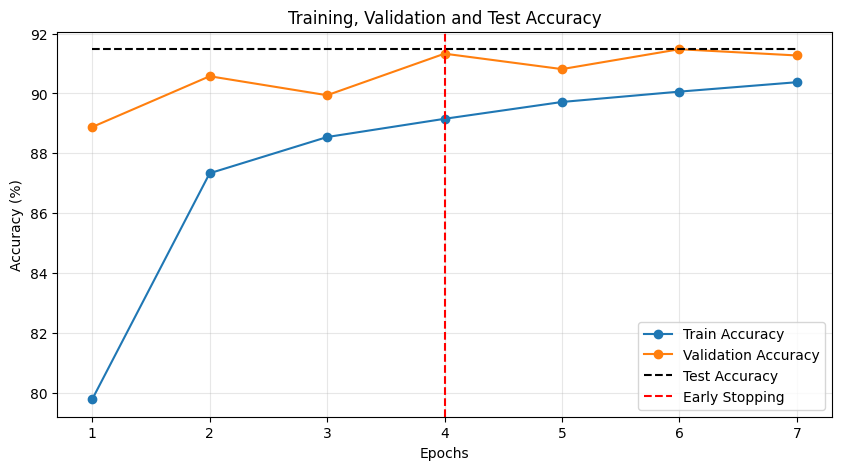

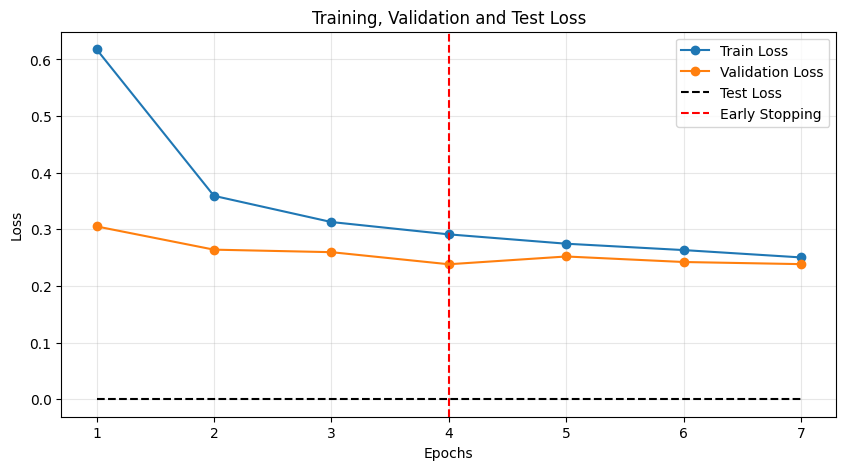

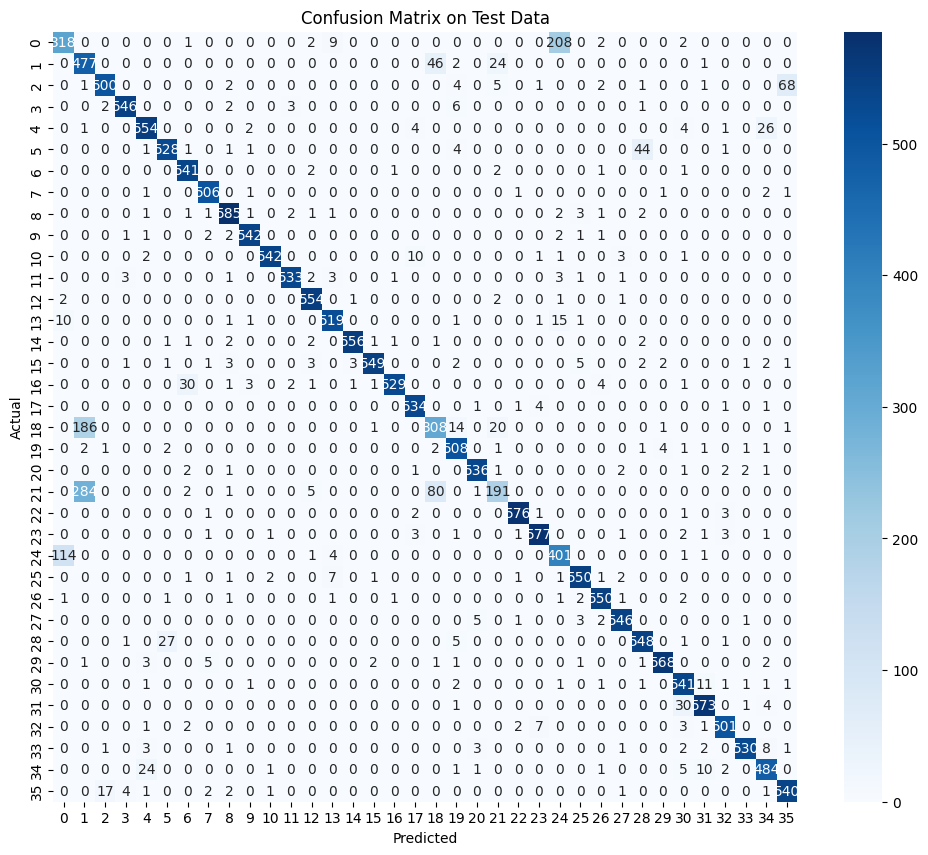

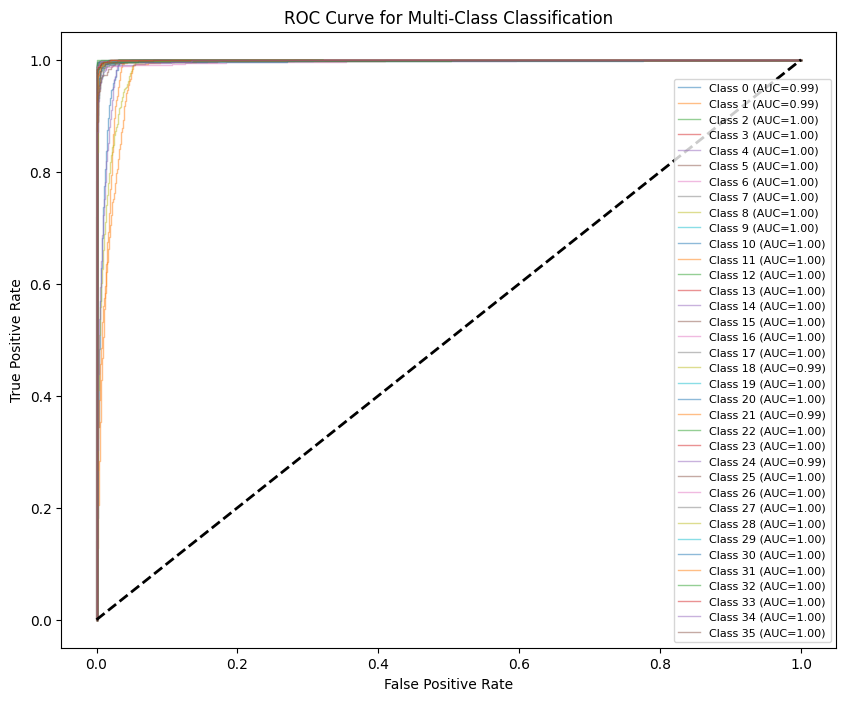

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize


#Accuracy graph
plt.figure(figsize=(10,5))
plt.plot(range(1, len(train_acc_list)+1), train_acc_list, label='Train Accuracy', marker='o')
plt.plot(range(1, len(val_acc_list)+1), val_acc_list, label='Validation Accuracy', marker='o')
plt.plot(range(1, len(test_acc_list)+1), test_acc_list, label='Test Accuracy', linestyle='--', color='black')
plt.axvline(x=best_epoch+1, color='red', linestyle='--', label='Early Stopping')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training, Validation and Test Accuracy')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

#Loss Plot
plt.figure(figsize=(10,5))
plt.plot(range(1, len(train_loss_list)+1), train_loss_list, label='Train Loss', marker='o')
plt.plot(range(1, len(val_loss_list)+1), val_loss_list, label='Validation Loss', marker='o')
plt.plot(range(1, len(test_loss_list)+1), test_loss_list, label='Test Loss', linestyle='--', color='black')
plt.axvline(x=best_epoch+1, color='red', linestyle='--', label='Early Stopping')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training, Validation and Test Loss')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

#Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix on Test Data')
plt.show()

# ROC Curve (Multi-class)
num_classes = 36
y_test_bin = label_binarize(all_labels, classes=range(num_classes))


all_probs = []
model_early.eval()
with torch.no_grad():
    for images, _ in test_loader:
        images = images.to(device)
        outputs = model_early(images)
        probs = torch.nn.functional.softmax(outputs, dim=1)
        all_probs.append(probs.cpu().numpy())

y_score = np.vstack(all_probs)

plt.figure(figsize=(10,8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha=0.5, label=f'Class {i} (AUC={roc_auc:.2f})')

plt.plot([0,1], [0,1], color='black', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc='lower right', fontsize=8)
plt.show()


K-FOLD

In [ ]:
import torch
from torch.utils.data import Subset
from sklearn.model_selection import KFold
import numpy as np

batch_size = 32
epochs = 3
k = 3  # Number of folds

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)





train_size = int(0.7 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])


test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

kf = KFold(n_splits=k, shuffle=True, random_state=42)

fold_train_accs, fold_val_accs = [], []
fold_train_losses, fold_val_losses = [], []
fold_test_accs, fold_test_precisions, fold_test_recalls, fold_test_f1s = [], [], [], []

train_time_start = time.time()
print(f"---------Training start time is here-----------------: {train_time_start}")
for fold, (train_idx, val_idx) in enumerate(kf.split(train_dataset)):
    print(f"\n--- Fold {fold+1}/{k} ---")

    train_acc_list = []
    val_acc_list = []
    train_loss_list = []
    val_loss_list = []

    fold_train_subset = Subset(train_dataset, train_idx)
    fold_val_subset = Subset(train_dataset, val_idx)

    train_loader = DataLoader(fold_train_subset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(fold_val_subset, batch_size=batch_size, shuffle=False)

    model_kfold = BaseCNN(num_classes=36).to(device)
    optimiser = torch.optim.Adam(model_kfold.parameters(), lr=0.001)
    criterion = torch.nn.CrossEntropyLoss()

    for epoch in range(epochs):
        # Training
        model_kfold.train()
        running_loss, correct, total = 0, 0, 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimiser.zero_grad()
            outputs = model_kfold(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimiser.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        train_acc = 100 * correct / total
        train_loss = running_loss/len(train_loader)



        # Validation
        model_kfold.eval()
        val_loss = 0.0
        val_correct, val_total = 0, 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model_kfold(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                val_correct += (predicted == labels).sum().item()
                val_total += labels.size(0)

        val_acc = 100 * val_correct / val_total
        val_loss = val_loss/len(val_loader)

        val_acc_list.append(val_acc)
        val_loss_list.append(val_loss)
        train_acc_list.append(train_acc)
        train_loss_list.append(train_loss)

        print(f"Epoch [{epoch+1}/{epochs}] | Train Acc: {train_acc:.2f}% | Training Loss : {train_loss:.2f}| Val Loss: {val_loss:.2f}| Val Acc: {val_acc:.2f}%")



    fold_train_accs.append(train_acc_list)
    fold_val_accs.append(val_acc_list)
    fold_train_losses.append(train_loss_list)
    fold_val_losses.append(val_loss_list)

    all_preds, all_labels = [], []
    test_loss_total = 0.0
    model_kfold.eval()
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model_kfold(images)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            loss = criterion(outputs, labels)
            test_loss_total += loss.item()

    test_loss = test_loss_total / len(test_loader)


    test_accuracy = accuracy_score(all_labels, all_preds) * 100
    test_precision = precision_score(all_labels, all_preds, average='macro') * 100
    test_recall = recall_score(all_labels, all_preds, average='macro') * 100
    test_f1 = f1_score(all_labels, all_preds, average='macro') * 100

    fold_test_accs.append(test_accuracy)
    fold_test_precisions.append(test_precision)
    fold_test_recalls.append(test_recall)
    fold_test_f1s.append(test_f1)

print(f"Training time ends here: {time.time() - train_time_start} seconds")

# Extract last epoch accuracies for each fold
train_final_accs = [acc_list[-1] for acc_list in fold_train_accs]
val_final_accs = [acc_list[-1] for acc_list in fold_val_accs]


print(f"\nTrain Accuracy: {np.mean(train_final_accs):.2f}%")
print(f"Validation Accuracy: {np.mean(val_final_accs):.2f}%")
print(f"Test Accuracy: {np.mean(fold_test_accs):.2f}%")
print(f"Test Precision: {np.mean(fold_test_precisions):.2f}%")
print(f"Test Recall: {np.mean(fold_test_recalls):.2f}%")
print(f"Test F1-Score: {np.mean(fold_test_f1s):.2f}%")


Using device: cuda
---------Training start time is here-----------------: 1762487033.0364847

--- Fold 1/3 ---
Epoch [1/3] | Train Acc: 77.17% | Training Loss : 0.73| Val Loss: 0.32| Val Acc: 88.34%
Epoch [2/3] | Train Acc: 86.04% | Training Loss : 0.40| Val Loss: 0.27| Val Acc: 89.73%
Epoch [3/3] | Train Acc: 87.57% | Training Loss : 0.34| Val Loss: 0.27| Val Acc: 89.93%

--- Fold 2/3 ---
Epoch [1/3] | Train Acc: 76.19% | Training Loss : 0.75| Val Loss: 0.33| Val Acc: 87.95%
Epoch [2/3] | Train Acc: 85.86% | Training Loss : 0.40| Val Loss: 0.30| Val Acc: 88.92%
Epoch [3/3] | Train Acc: 87.26% | Training Loss : 0.35| Val Loss: 0.26| Val Acc: 90.25%

--- Fold 3/3 ---
Epoch [1/3] | Train Acc: 77.65% | Training Loss : 0.70| Val Loss: 0.31| Val Acc: 88.64%
Epoch [2/3] | Train Acc: 86.67% | Training Loss : 0.38| Val Loss: 0.28| Val Acc: 89.32%
Epoch [3/3] | Train Acc: 88.20% | Training Loss : 0.33| Val Loss: 0.27| Val Acc: 90.18%
Training time ends here: 439.2856616973877 seconds

Train Acc

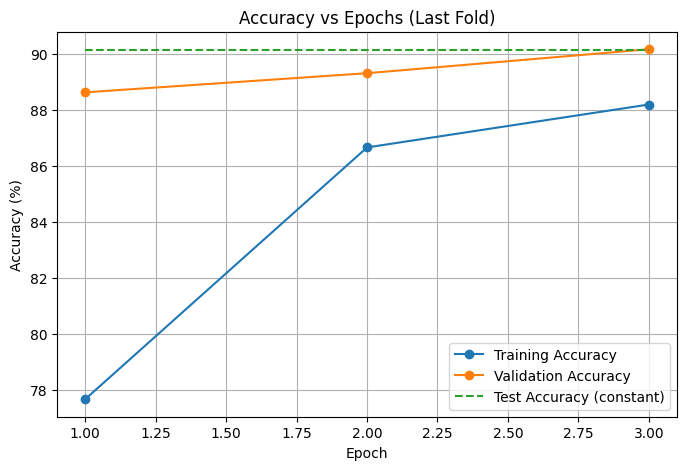

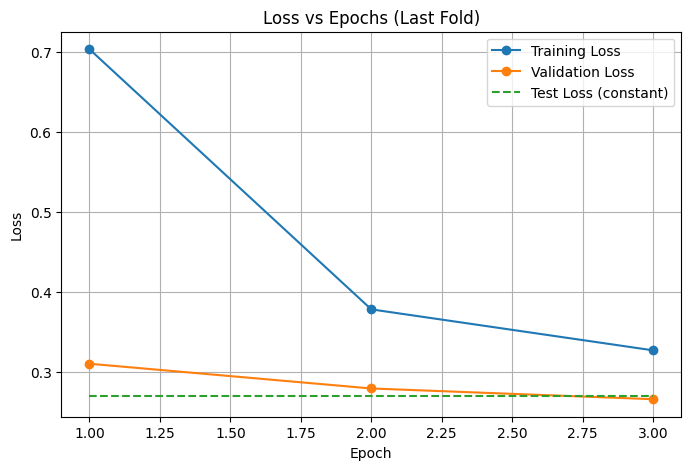

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Plotting on the basis of last fold
last_fold_val = k - 1  # index of last fold

train_acc = fold_train_accs[last_fold_val]
val_acc = fold_val_accs[last_fold_val]
train_loss = fold_train_losses[last_fold_val]
val_loss = fold_val_losses[last_fold_val]
test_acc = fold_test_accs[last_fold_val]

epochs_range = range(1, epochs + 1)

# Accuracy plot
plt.figure(figsize=(8,5))
plt.plot(epochs_range, train_acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.plot(epochs_range, [test_acc]*epochs, label='Test Accuracy (constant)', linestyle='--')
plt.title('Accuracy vs Epochs (Last Fold)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)
plt.show()

# Loss plot
plt.figure(figsize=(8,5))
plt.plot(epochs_range, train_loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.plot(epochs_range, [test_loss]*epochs, label='Test Loss (constant)', linestyle='--')
plt.title('Loss vs Epochs (Last Fold)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()





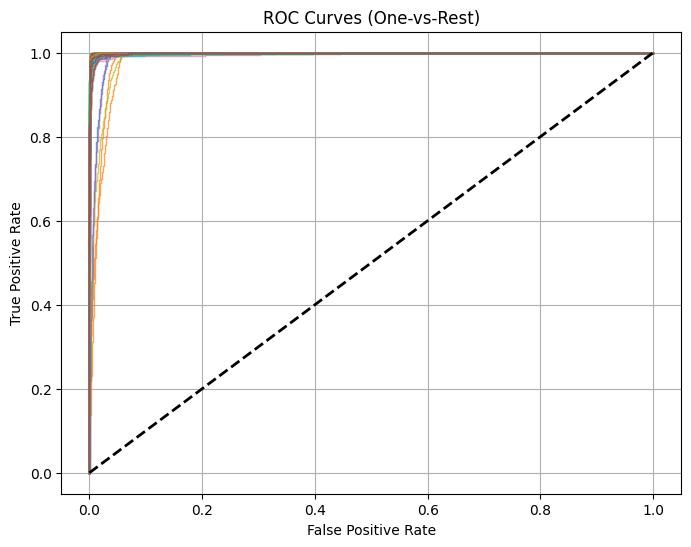

In [ ]:

num_classes = 36
# Convert labels to one-hot for multi-class ROC
y_true_bin = label_binarize(all_labels, classes=list(range(num_classes)))


model_kfold.eval()
all_probs = []
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model_kfold(images)
        probs = torch.softmax(outputs, dim=1)
        all_probs.extend(probs.cpu().numpy())

all_probs = np.array(all_probs)

# Plot ROC for each class (or average)
plt.figure(figsize=(8,6))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], all_probs[:, i])
    plt.plot(fpr, tpr, lw=1, alpha=0.7)

plt.plot([0,1], [0,1], 'k--', lw=2)
plt.title('ROC Curves (One-vs-Rest)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

Learning Rate scheduler

In [ ]:
import torch
from torch.utils.data import random_split, DataLoader
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

batch_size = 32
epochs = 7

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# --- Dataset split ---
train_size = int(0.7 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


model_learningrate = BaseCNN(num_classes=36).to(device)
optimiser = torch.optim.Adam(model_learningrate.parameters(), lr=0.001)
criterion = torch.nn.CrossEntropyLoss()

#Scheduler initialise
scheduler = torch.optim.lr_scheduler.StepLR(optimiser, step_size=1, gamma=0.5)

train_acc_list, val_acc_list = [], []
train_loss_list, val_loss_list = [], []

train_time_start = time.time()
print(f"---------Training start time is here-----------------: {train_time_start}")

for epoch in range(epochs):
    model_learningrate.train()
    running_loss, correct, total = 0, 0, 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimiser.zero_grad()
        outputs = model_learningrate(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimiser.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    train_acc = 100 * correct / total
    train_loss = running_loss / len(train_loader)


    model_learningrate.eval()
    val_loss = 0.0
    val_correct, val_total = 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model_learningrate(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            val_correct += (predicted == labels).sum().item()
            val_total += labels.size(0)

    val_acc = 100 * val_correct / val_total
    val_loss = val_loss / len(val_loader)

    train_acc_list.append(train_acc)
    train_loss_list.append(train_loss)
    val_acc_list.append(val_acc)
    val_loss_list.append(val_loss)

    print(f"Current Epoch {epoch+1}/{epochs} | Train Acc: {train_acc:.2f}% | Train Loss: {train_loss:.2f} | Val Acc: {val_acc:.2f}% | Val Loss: {val_loss:.2f}")

    #Scheduler is being used up here
    scheduler.step()
    current_lr = optimiser.param_groups[0]['lr']
    print(f"Current Learning Rate: {current_lr:.6f}")

print(f"Training time ends here: {time.time() - train_time_start} seconds")

all_preds, all_labels = [], []
test_loss_total = 0.0
model_learningrate.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model_learningrate(images)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        loss = criterion(outputs, labels)
        test_loss_total += loss.item()

test_loss = test_loss_total / len(test_loader)
test_accuracy = accuracy_score(all_labels, all_preds) * 100
test_precision = precision_score(all_labels, all_preds, average='macro') * 100
test_recall = recall_score(all_labels, all_preds, average='macro') * 100
test_f1 = f1_score(all_labels, all_preds, average='macro') * 100

print(f"\nTest Accuracy: {test_accuracy:.2f}%")
print(f"Test Precision: {test_precision:.2f}%")
print(f"Test Recall: {test_recall:.2f}%")
print(f"Test F1-Score: {test_f1:.2f}%")


Using device: cuda
---------Training start time is here-----------------: 1762487598.9261906
Current Epoch 1/7 | Train Acc: 80.57% | Train Loss: 0.60 | Val Acc: 89.64% | Val Loss: 0.29
Current Learning Rate: 0.000500
Current Epoch 2/7 | Train Acc: 88.55% | Train Loss: 0.32 | Val Acc: 90.62% | Val Loss: 0.25
Current Learning Rate: 0.000250
Current Epoch 3/7 | Train Acc: 90.19% | Train Loss: 0.27 | Val Acc: 91.38% | Val Loss: 0.23
Current Learning Rate: 0.000125
Current Epoch 4/7 | Train Acc: 90.99% | Train Loss: 0.24 | Val Acc: 91.65% | Val Loss: 0.22
Current Learning Rate: 0.000063
Current Epoch 5/7 | Train Acc: 91.42% | Train Loss: 0.23 | Val Acc: 91.82% | Val Loss: 0.22
Current Learning Rate: 0.000031
Current Epoch 6/7 | Train Acc: 91.58% | Train Loss: 0.22 | Val Acc: 91.90% | Val Loss: 0.22
Current Learning Rate: 0.000016
Current Epoch 7/7 | Train Acc: 91.76% | Train Loss: 0.22 | Val Acc: 91.86% | Val Loss: 0.22
Current Learning Rate: 0.000008
Training time ends here: 379.4075231552

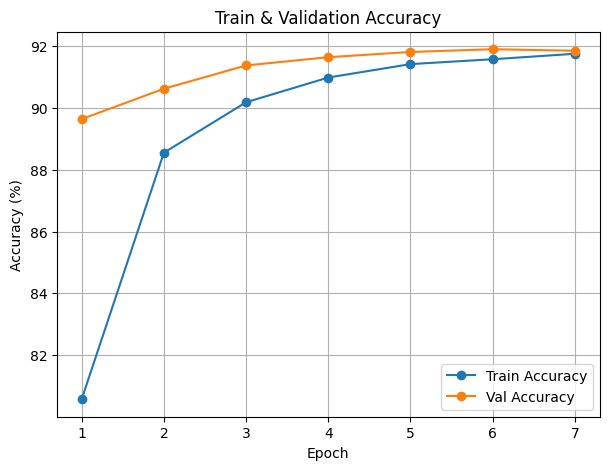

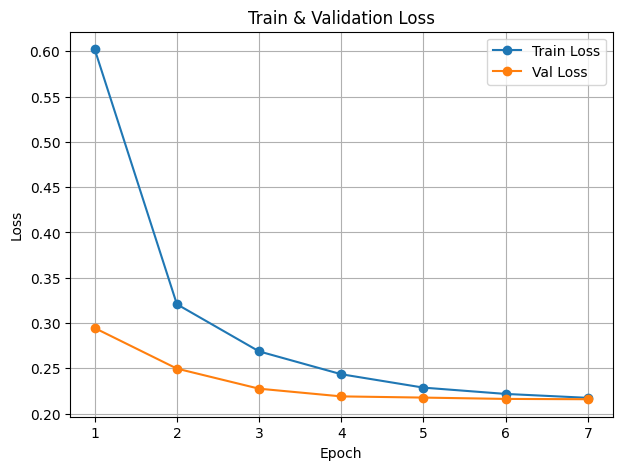

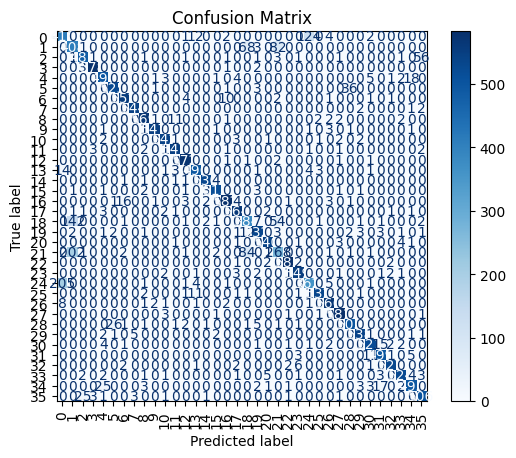

In [ ]:
import matplotlib.pyplot as plt

epochs_range = range(1, epochs + 1)

# Accuracy depiction
plt.figure(figsize=(7,5))
plt.plot(epochs_range, train_acc_list, label='Train Accuracy', marker='o')
plt.plot(epochs_range, val_acc_list, label='Val Accuracy', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Train & Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

#Loss depiction
plt.figure(figsize=(7,5))
plt.plot(epochs_range, train_loss_list, label='Train Loss', marker='o')
plt.plot(epochs_range, val_loss_list, label='Val Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train & Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.show()


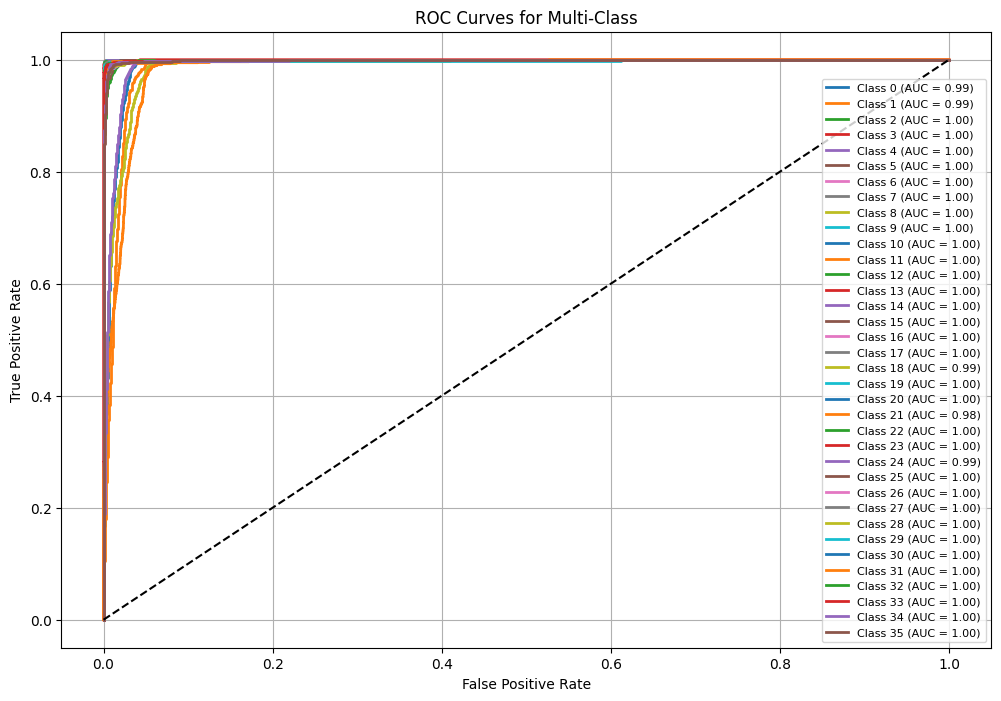

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binarize labels for multi-class ROC
num_classes = 36  #Number of neurons in our dataset
y_test_bin = label_binarize(all_labels, classes=list(range(num_classes)))


model_learningrate.eval()
all_probs = []
with torch.no_grad():
    for images, _ in test_loader:
        images = images.to(device)
        outputs = model_learningrate(images)
        probs = torch.softmax(outputs, dim=1) #Applying softmax (activation function used to determine the logits)
        all_probs.append(probs.cpu().numpy())
all_probs = np.vstack(all_probs)

# Plot ROC for each class
plt.figure(figsize=(12, 8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], all_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multi-Class')
plt.legend(loc='lower right', fontsize=8)
plt.grid(True)
plt.show()


In [ ]:
Path = "a2_part3_weights_rajagop6_dikshant"

torch.save(model_learningrate.state_dict(), Path)

### Part 4
**Implement** **VGG**


Architecture

In [11]:
import torch
import torch.nn as nn

class VGG13_Modified(nn.Module):
    def __init__(self, num_classes=36):
        super(VGG13_Modified, self).__init__()

        # Original: [64, 64, M, 128, 128, M, 256, 256, M, 512, 512, M, 512, 512, M]
        # we remove the last two pooling layers -> keeps final feature map size reasonable.
        self.features = nn.Sequential(

            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),


            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),


            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            # nn.MaxPool2d(kernel_size=2, stride=2),
            # removed pooling here


            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            # removed pooling here


            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )


        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(512 * 3 * 3, 512),
            nn.ReLU(True),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x


In [12]:
import torch.optim as optim

model = VGG13_Modified(num_classes=36).to(device)

model.to(device)

optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-5)

criterion = nn.CrossEntropyLoss().to(device)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)


In [13]:
print(device)

cuda


In [14]:
model.to(device)
criterion = criterion.to(device)

num_epochs = 7

for epoch in range(num_epochs):
    print(f"Starting epoch {epoch+1}")
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    train_acc = 100 * correct / total
    scheduler.step()

    model.eval()
    val_correct, val_total = 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            val_correct += (predicted == labels).sum().item()
            val_total += labels.size(0)

    val_acc = 100 * val_correct / val_total
    print(f"Epoch [{epoch+1}/{num_epochs}] | Loss: {running_loss/len(train_loader):.4f} "
          f"| Train Acc: {train_acc:.2f}% | Val Acc: {val_acc:.2f}% | LR: {optimizer.param_groups[0]['lr']:.10f}")

model.eval()
test_correct, test_total = 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        test_correct += (predicted == labels).sum().item()
        test_total += labels.size(0)

test_acc = 100 * test_correct / test_total
print(f"\nFinal Test Accuracy: {test_acc:.2f}%")




Starting epoch 1
Epoch [1/7] | Loss: 1.1586 | Train Acc: 63.90% | Val Acc: 88.08% | LR: 0.0001000000
Starting epoch 2
Epoch [2/7] | Loss: 0.3580 | Train Acc: 87.43% | Val Acc: 89.88% | LR: 0.0001000000
Starting epoch 3
Epoch [3/7] | Loss: 0.2933 | Train Acc: 89.49% | Val Acc: 90.47% | LR: 0.0001000000
Starting epoch 4
Epoch [4/7] | Loss: 0.2590 | Train Acc: 90.53% | Val Acc: 92.18% | LR: 0.0001000000
Starting epoch 5
Epoch [5/7] | Loss: 0.2380 | Train Acc: 91.11% | Val Acc: 92.58% | LR: 0.0000500000
Starting epoch 6
Epoch [6/7] | Loss: 0.1964 | Train Acc: 92.50% | Val Acc: 93.46% | LR: 0.0000500000
Starting epoch 7
Epoch [7/7] | Loss: 0.1860 | Train Acc: 92.68% | Val Acc: 93.70% | LR: 0.0000500000

Final Test Accuracy: 93.70%


Early stopping

In [22]:

batch_size = 32
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset , test_dataset = random_split(dataset, [train_size, val_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle = False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)



In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
import time
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

#Defne the number of epochs and the patience level
num_epochs = 5
patience = 5
learning_rate = 1e-4

#Set model below
model_4_earlystopping = VGG13_Modified(num_classes=36).to(device)
criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model_4_earlystopping.parameters(), lr=learning_rate, weight_decay=1e-5)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)


best_val_loss = float('inf')
patience_counter = 0
best_model_state = None
best_epoch = 0


train_losses = []
train_accs = []


val_losses = []
val_accs = []

start_time = time.time()
for epoch in range(num_epochs):
    print(f"\nStarting epoch {epoch+1}")
    model_4_earlystopping.train()
    running_loss, correct, total = 0.0, 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model_4_earlystopping(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    train_loss = running_loss / len(train_loader)
    train_acc = 100 * correct / total

    train_losses.append(train_loss)
    train_accs.append(train_acc)

    scheduler.step()


    model_4_earlystopping.eval()

    val_loss, val_correct, val_total = 0.0, 0, 0

    val_labels = []
    val_preds = []

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model_4_earlystopping(images)

            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            val_correct += (predicted == labels).sum().item()
            val_total += labels.size(0)

            val_labels.extend(labels.cpu().numpy())
            val_preds.extend(predicted.cpu().numpy())

    val_loss /= len(test_loader)
    val_acc = 100 * val_correct / val_total
    val_losses.append(val_loss)
    val_accs.append(val_acc)

    # Validation metrics
    val_precision, val_recall, val_f1, _ = precision_recall_fscore_support(
        val_labels, val_preds, average='weighted'
    )

    print(f"Epoch [{epoch+1}/{num_epochs}] | "f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}% | " f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.2f}%")


    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_state = model_4_earlystopping.state_dict()
        best_epoch = epoch
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}")
            break


model_4_earlystopping.load_state_dict(best_model_state)
print(f"\nBest model loaded from epoch {best_epoch+1}")
print(f"Training finished in {time.time() - start_time:.2f} seconds")


all_labels = []
all_preds = []
all_probs = []

model_4_earlystopping.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model_4_earlystopping(images)
        probs = torch.softmax(outputs, dim=1)
        _, predicted = torch.max(outputs, 1)
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())
        all_probs.extend(probs.cpu().numpy())


test_acc = accuracy_score(all_labels, all_preds) * 100
precision, recall, f1, _ = precision_recall_fscore_support(
    all_labels, all_preds, average='weighted'
)

print(f"\nFinal Test Accuracy: {test_acc:.2f}%")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall:    {recall:.4f}")
print(f"Test F1 Score:  {f1:.4f}")



Starting epoch 1
Epoch [1/5] | Train Loss: 1.0360 | Train Acc: 67.63% | Val Loss: 0.3645 | Val Acc: 87.02%

Starting epoch 2
Epoch [2/5] | Train Loss: 0.3578 | Train Acc: 87.09% | Val Loss: 0.2695 | Val Acc: 90.08%

Starting epoch 3
Epoch [3/5] | Train Loss: 0.2876 | Train Acc: 89.30% | Val Loss: 0.2673 | Val Acc: 89.96%

Starting epoch 4
Epoch [4/5] | Train Loss: 0.2535 | Train Acc: 90.49% | Val Loss: 0.2293 | Val Acc: 91.52%

Starting epoch 5
Epoch [5/5] | Train Loss: 0.2288 | Train Acc: 91.22% | Val Loss: 0.2401 | Val Acc: 90.81%

Best model loaded from epoch 4
Training finished in 464.09 seconds

Final Test Accuracy: 90.41%
Test Precision: 0.9080
Test Recall:    0.9041
Test F1 Score:  0.9035


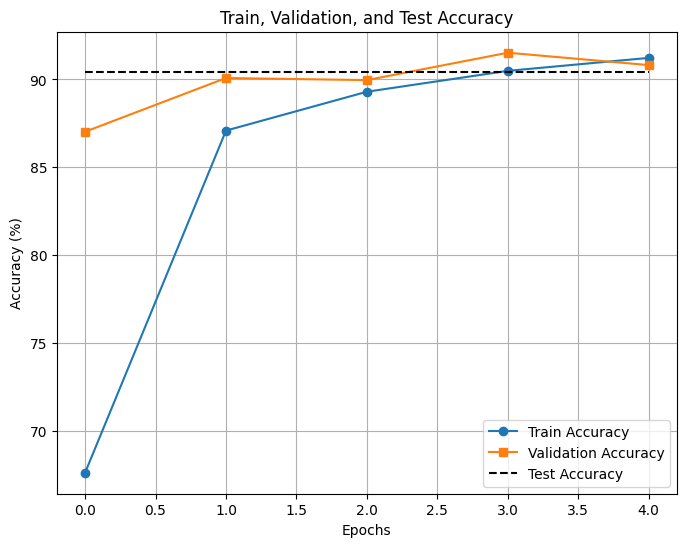

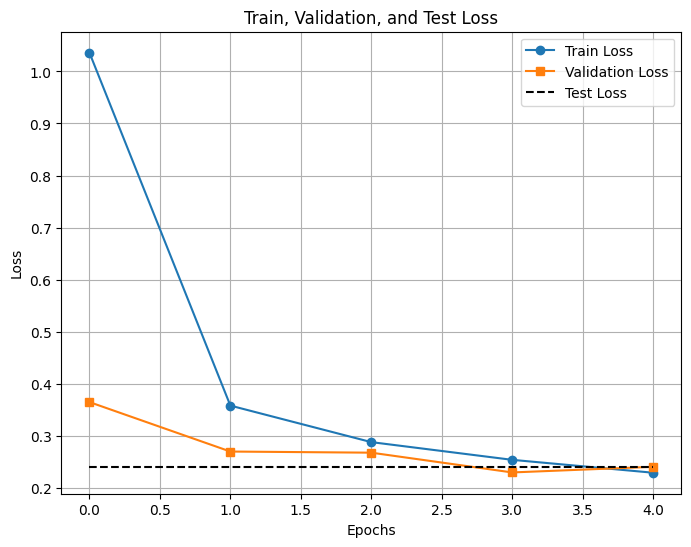

In [30]:
import matplotlib.pyplot as plt

# Repeat test accuracy for plotting
test_accs_plot = [test_acc] * len(train_accs)

plt.figure(figsize=(8,6))
plt.plot(train_accs, label="Train Accuracy", marker='o')
plt.plot(val_accs, label="Validation Accuracy", marker='s')
plt.plot(test_accs_plot, label="Test Accuracy", linestyle='--', color='black')
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Train, Validation, and Test Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Repeat test loss for plotting
test_loss = val_losses[-1]  # If you want a similar representation
test_losses_plot = [test_loss] * len(train_losses)

plt.figure(figsize=(8,6))
plt.plot(train_losses, label="Train Loss", marker='o')
plt.plot(val_losses, label="Validation Loss", marker='s')
plt.plot(test_losses_plot, label="Test Loss", linestyle='--', color='black')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train, Validation, and Test Loss")
plt.legend()
plt.grid(True)
plt.show()



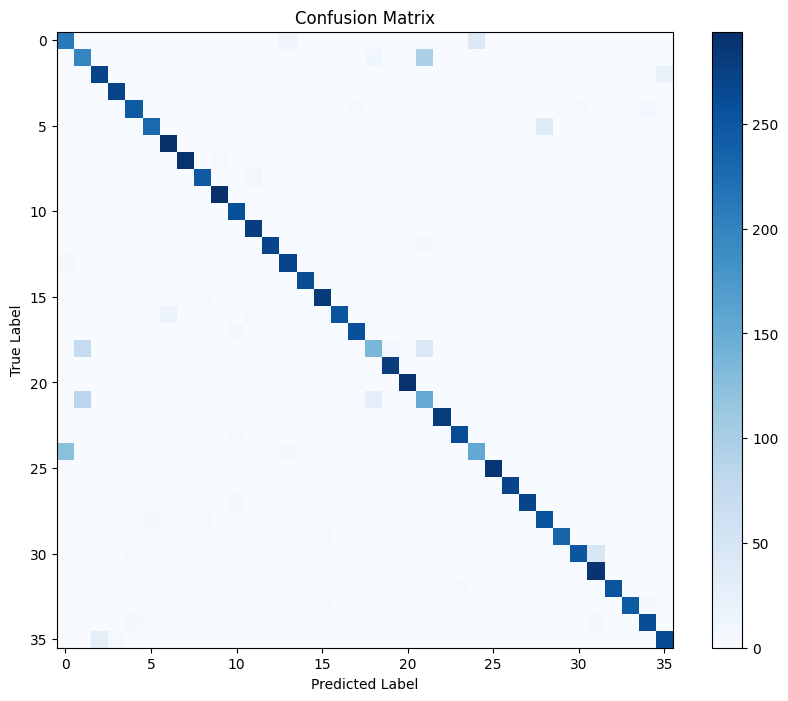

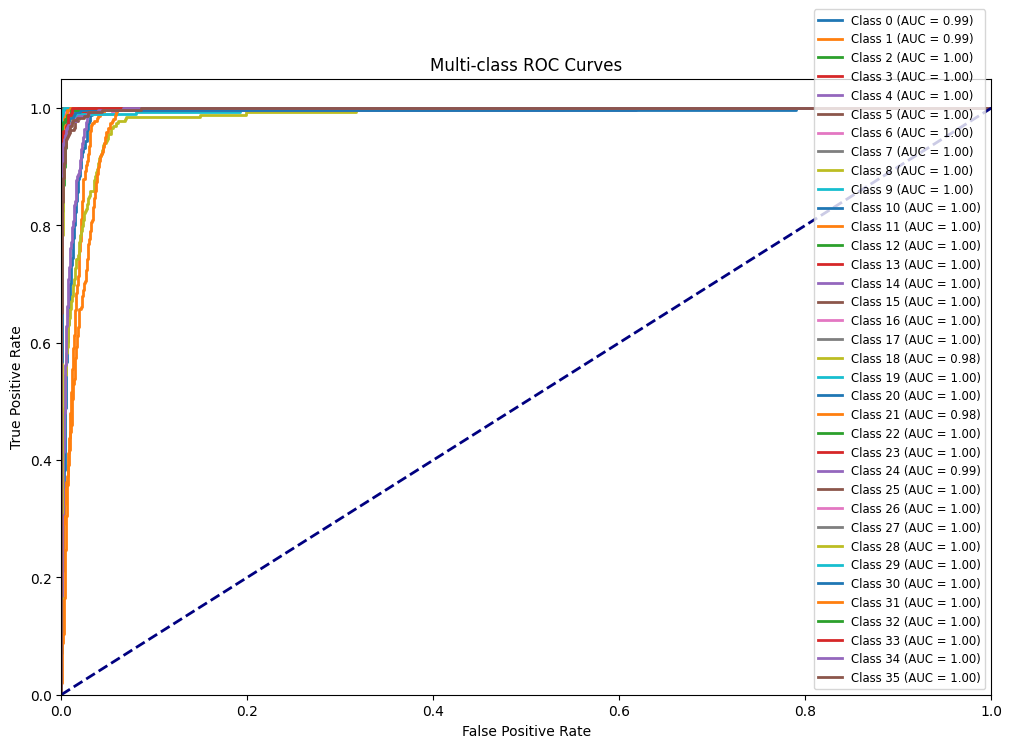

In [31]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

num_classes = 36
all_probs = np.array(all_probs)
all_labels_bin = label_binarize(all_labels, classes=np.arange(num_classes))

plt.figure(figsize=(12, 8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(all_labels_bin[:, i], all_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curves')
plt.legend(loc="lower right", fontsize='small')
plt.show()


K-FOLD

In [36]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np


num_epochs = 2
learning_rate = 1e-4
num_folds = 2
num_classes = 36

#Check if cuda or cpu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

fold_train_losses, fold_val_losses = [], []
fold_train_accs, fold_val_accs = [], []
fold_test_accs = []
fold_conf_matrices = []
fold_roc_data = []

for fold, (train_idx, val_idx) in enumerate(kf.split(dataset)):
    print(f"\n--- Fold {fold+1}/{num_folds} ---")

    train_subset = torch.utils.data.Subset(dataset, train_idx)
    val_subset = torch.utils.data.Subset(dataset, val_idx)

    train_loader = torch.utils.data.DataLoader(train_subset, batch_size=32, shuffle=True)
    val_loader = torch.utils.data.DataLoader(val_subset, batch_size=32, shuffle=False)

    model_4_kfold = VGG13_Modified(num_classes=num_classes).to(device)
    optimizer = optim.Adam(model_4_kfold.parameters(), lr=learning_rate, weight_decay=1e-5)
    criterion = nn.CrossEntropyLoss().to(device)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

    train_losses, val_losses, train_accs, val_accs = [], [], [], []

    for epoch in range(num_epochs):
        model_4_kfold.train()
        running_loss, correct, total = 0.0, 0, 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model_4_kfold(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        train_loss = running_loss / len(train_loader)
        train_acc = 100 * correct / total
        train_losses.append(train_loss)
        train_accs.append(train_acc)
        scheduler.step()

        # Validation
        model_4_kfold.eval()
        val_loss, val_correct, val_total = 0.0, 0, 0
        val_labels, val_preds, val_probs = [], [], []

        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model_4_kfold(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                probs = torch.softmax(outputs, dim=1)
                _, predicted = torch.max(outputs, 1)
                val_correct += (predicted == labels).sum().item()
                val_total += labels.size(0)
                val_labels.extend(labels.cpu().numpy())
                val_preds.extend(predicted.cpu().numpy())
                val_probs.extend(probs.cpu().numpy())

        val_loss /= len(val_loader)
        val_acc = 100 * val_correct / val_total
        val_losses.append(val_loss)
        val_accs.append(val_acc)

        print(f"Epoch [{epoch+1}/{num_epochs}] | "f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}% | " f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.2f}%")

    # Store fold value results
    fold_train_losses.append(train_losses)
    fold_val_losses.append(val_losses)
    fold_train_accs.append(train_accs)
    fold_val_accs.append(val_accs)

    # Confusion matrix and ROC
    cm = confusion_matrix(val_labels, val_preds)
    fold_conf_matrices.append(cm)


    val_labels_onehot = np.eye(num_classes)[val_labels]
    val_probs = np.array(val_probs)
    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(val_labels_onehot[:, i], val_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    fold_roc_data.append((fpr, tpr, roc_auc))

    acc = accuracy_score(val_labels, val_preds) * 100
    fold_test_accs.append(acc)
    print(f"Fold {fold+1} Accuracy: {acc:.2f}%")


full_loader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)
test_labels, test_preds, test_probs = [], [], []

#Creating another model model_final so that it could run over the test data set
model_final = VGG13_Modified(num_classes=num_classes).to(device)
optimizer = optim.Adam(model_final.parameters(), lr=learning_rate, weight_decay=1e-5)
criterion = nn.CrossEntropyLoss().to(device)


for epoch in range(num_epochs):
    model_final.train()
    for images, labels in full_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model_final(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# Evaluate on test_loader
model_final.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model_final(images)
        probs = torch.softmax(outputs, dim=1)
        _, predicted = torch.max(outputs, 1)
        test_labels.extend(labels.cpu().numpy())
        test_preds.extend(predicted.cpu().numpy())
        test_probs.extend(probs.cpu().numpy())

test_acc = accuracy_score(test_labels, test_preds) * 100
precision, recall, f1, _ = precision_recall_fscore_support(test_labels, test_preds, average='weighted')
print(f"\nFinal Test Accuracy: {test_acc:.2f}% | Precision: {precision:.4f} | Recall: {recall:.4f} | F1: {f1:.4f}")




--- Fold 1/2 ---
Epoch [1/2] | Train Loss: 1.4900 | Train Acc: 55.28% | Val Loss: 0.4450 | Val Acc: 84.98%
Epoch [2/2] | Train Loss: 0.4592 | Train Acc: 84.09% | Val Loss: 0.3293 | Val Acc: 87.90%
Fold 1 Accuracy: 87.90%

--- Fold 2/2 ---
Epoch [1/2] | Train Loss: 1.5410 | Train Acc: 52.93% | Val Loss: 0.4358 | Val Acc: 84.20%
Epoch [2/2] | Train Loss: 0.4473 | Train Acc: 84.67% | Val Loss: 0.3384 | Val Acc: 87.81%
Fold 2 Accuracy: 87.81%

Final Test Accuracy: 90.72% | Precision: 0.9160 | Recall: 0.9072 | F1: 0.9041


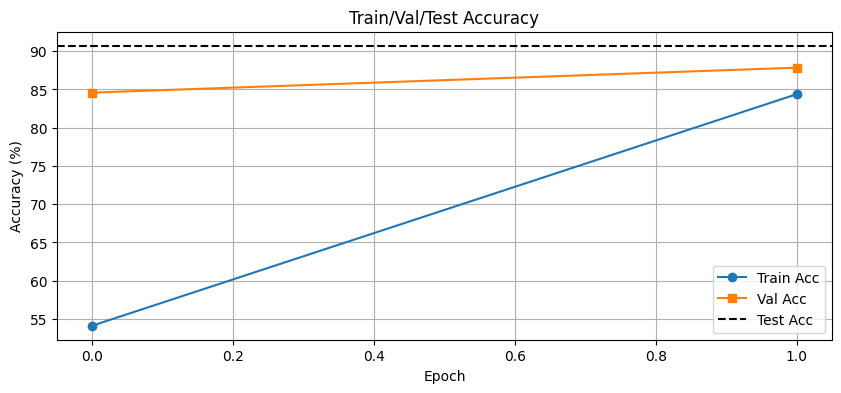

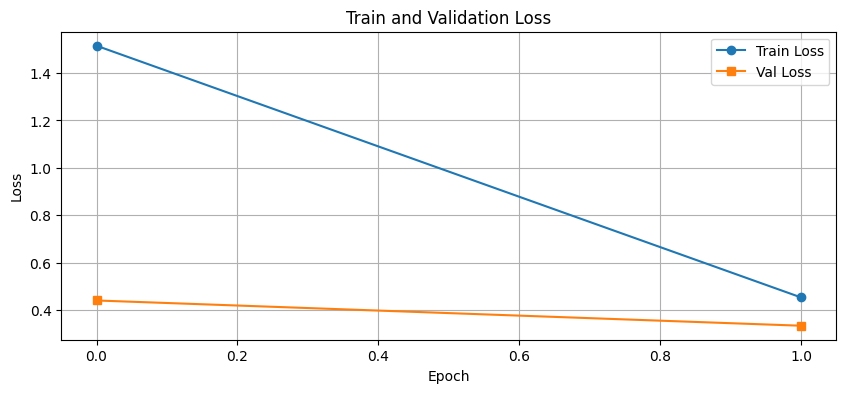

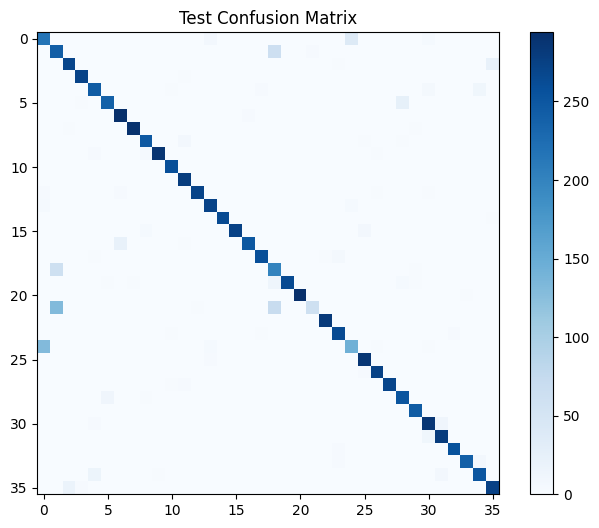

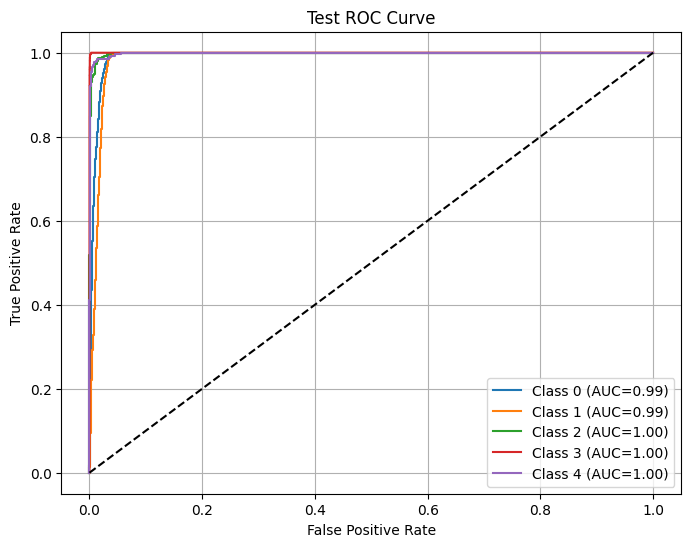

In [37]:

mean_train_acc = np.mean(fold_train_accs, axis=0)
mean_val_acc = np.mean(fold_val_accs, axis=0)
mean_train_loss = np.mean(fold_train_losses, axis=0)
mean_val_loss = np.mean(fold_val_losses, axis=0)

plt.figure(figsize=(10,4))

plt.plot(mean_train_acc, label='Train Acc', marker='o')
plt.plot(mean_val_acc, label='Val Acc', marker='s')
plt.axhline(y=test_acc, color='black', linestyle='--', label='Test Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Train/Val/Test Accuracy')
plt.legend()
plt.grid(True)

plt.figure(figsize=(10,4))
plt.plot(mean_train_loss, label='Train Loss', marker='o')
plt.plot(mean_val_loss, label='Val Loss', marker='s')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# -----------------------
# Confusion Matrix
# -----------------------
cm_test = confusion_matrix(test_labels, test_preds)
plt.figure(figsize=(8,6))
plt.imshow(cm_test, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Test Confusion Matrix')
plt.colorbar()
plt.show()

# -----------------------
# ROC Curve
# -----------------------
test_labels_onehot = np.eye(num_classes)[test_labels]
test_probs = np.array(test_probs)
fpr, tpr, roc_auc = {}, {}, {}
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(test_labels_onehot[:, i], test_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8,6))
for i in range(min(5, num_classes)):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC={roc_auc[i]:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [38]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


class VGG13_BatchNorm(nn.Module):
    def __init__(self, num_classes=36):
        super(VGG13_BatchNorm, self).__init__()

        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64), #Code for Batch normalisation
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),

            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),

            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(512*3*3, 512),
            nn.ReLU(True),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x


In [39]:
num_epochs = 5
learning_rate = 1e-4
batch_size = 32
num_classes = 36

model_4_batchNormalisation = VGG13_BatchNorm(num_classes=num_classes).to(device)
optimizer = optim.Adam(model_4_batchNormalisation.parameters(), lr=learning_rate, weight_decay=1e-5)
criterion = nn.CrossEntropyLoss().to(device)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)


train_losses, val_losses = [], []
train_accs, val_accs = [], []
all_labels, all_preds, all_probs = [], [], []


for epoch in range(num_epochs):
    model_4_batchNormalisation.train()
    running_loss, correct, total = 0.0, 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model_4_batchNormalisation(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    train_loss = running_loss / len(train_loader)
    train_acc = 100 * correct / total
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    scheduler.step()

    #Validation
    model_4_batchNormalisation.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model_4_batchNormalisation(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            probs = torch.softmax(outputs, dim=1)
            _, predicted = torch.max(outputs, 1)

            val_correct += (predicted == labels).sum().item()
            val_total += labels.size(0)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())

    val_loss /= len(val_loader)
    val_acc = 100 * val_correct / val_total
    val_losses.append(val_loss)
    val_accs.append(val_acc)

    print(f"Epoch [{epoch+1}/{num_epochs}] | "
          f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}% | "
          f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.2f}%")

#metric code
test_acc = accuracy_score(all_labels, all_preds) * 100
precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted')
print(f"\nTest Accuracy: {test_acc:.2f}% | Precision: {precision:.4f} | Recall: {recall:.4f} | F1: {f1:.4f}")


Epoch [1/5] | Train Loss: 0.5693 | Train Acc: 82.00% | Val Loss: 0.2910 | Val Acc: 89.15%
Epoch [2/5] | Train Loss: 0.2942 | Train Acc: 89.36% | Val Loss: 0.2929 | Val Acc: 89.04%
Epoch [3/5] | Train Loss: 0.2529 | Train Acc: 90.46% | Val Loss: 0.2546 | Val Acc: 90.46%
Epoch [4/5] | Train Loss: 0.2320 | Train Acc: 91.20% | Val Loss: 0.2422 | Val Acc: 91.02%
Epoch [5/5] | Train Loss: 0.2126 | Train Acc: 91.71% | Val Loss: 0.2364 | Val Acc: 91.27%

Test Accuracy: 90.19% | Precision: 0.9033 | Recall: 0.9019 | F1: 0.9012


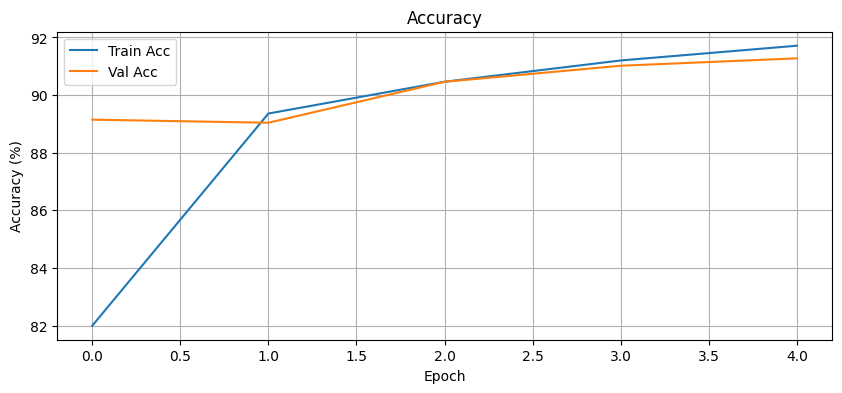

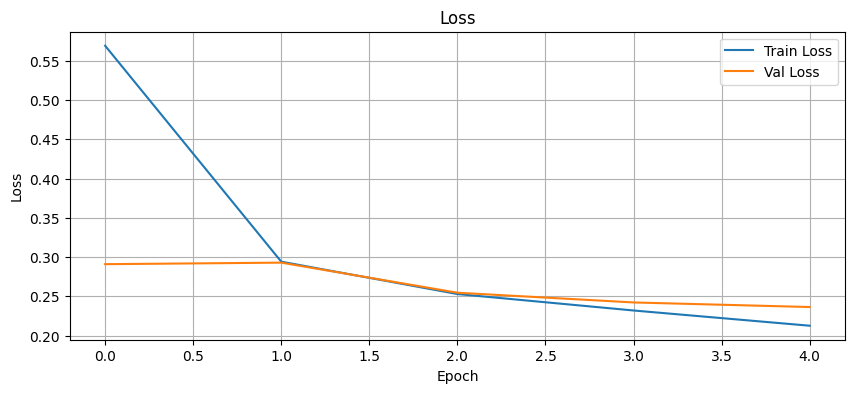

In [41]:
#Accuracy depiction
plt.figure(figsize=(10,4))
plt.plot(train_accs, label='Train Acc')
plt.plot(val_accs, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy')
plt.legend()
plt.grid(True)

#Loss depiction
plt.figure(figsize=(10,4))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()
plt.grid(True)
plt.show()


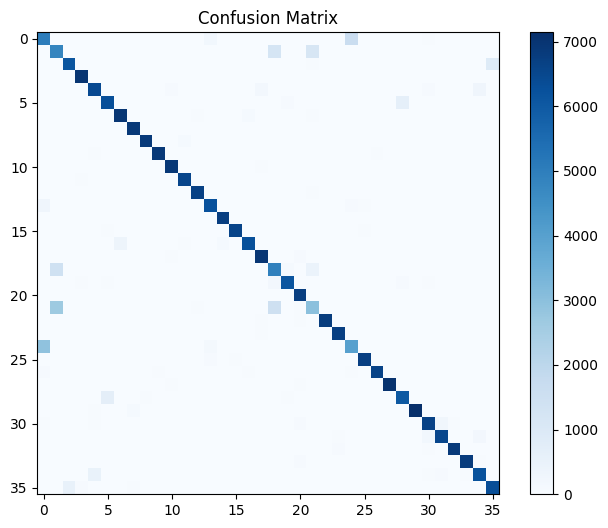

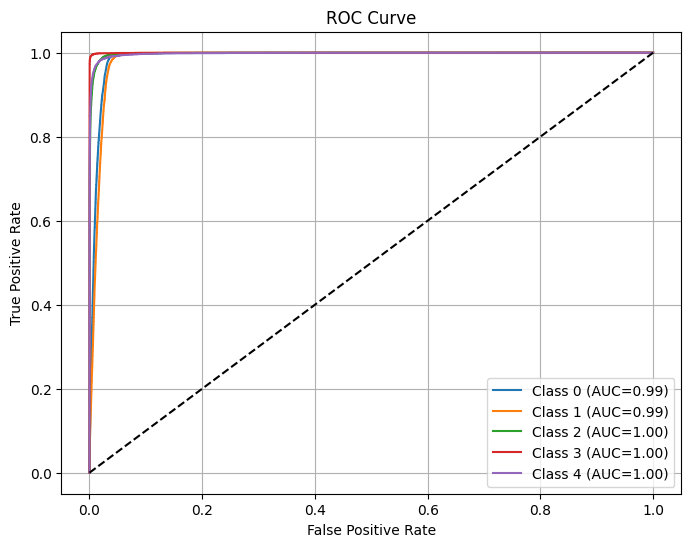

In [42]:

cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.show()


all_labels_onehot = np.eye(num_classes)[all_labels]
all_probs = np.array(all_probs)
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(all_labels_onehot[:, i], all_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8,6))
for i in range(min(5,num_classes)):  # plot first 5 classes as example
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC={roc_auc[i]:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

References

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.label_binarize.html

https://docs.pytorch.org/docs/stable/data.html#torch.utils.data.Subset

https://medium.com/@amir_hf8/implementing-vgg13-for-mnist-dataset-in-tensorflow-abc1460e2b93

Contribuition Table
| Step | Teammate | Contribution |
|------|-----------|---------------|
| Part 3|   | |
| Step 1-5 | Dikshant  | 100% |
| Step 6-10 | Abhishek | 100 % |
| Part 4|   | |
| Step 1-4| Dikshant  | 100%  |
| Step 5-7 | Abhishek | 100% |